<a href="https://colab.research.google.com/github/shraddha25-design/Credit_card_fraud_detection/blob/main/Credit_card_fraud_detection_Most_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

Aim of this capstone project is to detect potential frauds so that customers do not fall prey to the fraudulent transactions and banks can detect them sooner. Credit card fraud has become more frequent in recent years. So there is a dire need to improve risk management level in an effective way. This can be achieved by building an accurate & easy credit card risk monitoring system. There are many Machine learning algorithms that can be used for this purpose. The main aim of this project is to build a user model that best identifies fraud cases.

The project pipeline can be summarised as follows:
1. Data Understanding: Loading the data and observing the features present in it
 
2. Exploratory data analytics (EDA): Performing univariate and bivariate analyses of the data to observe relationship between Amout and Time with class. Dataset is checked for skewness and power tranform is used to mitigate the same, as it might cause problems during the model-building phase.
 
3. Train/Test Split: We performed train/test split, to check the performance of our models with unseen data. Here, for validation, you have use the Stratified k-fold cross-validation method. 
 
5. Model-Building/Hyperparameter Tuning: This is the final step at which we tried different models and fine-tuned their hyperparameters until we got the desired level of performance. For hyperparameter tuning, random and grid search are the two popular methods available in scikit-learn in the form of RandomiszedSearchCV and GridSearchCV, respectively.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler,PowerTransformer
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import skew

# Logistic Regression
from sklearn import linear_model #import the package
import statsmodels.api as sm

#Importing Miscellaneous Libraries
from collections import Counter
from numpy import argmax


#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

Sanity check on the data:

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


For Features that are not converted using PCA, let's check the data:

In [ ]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


Time here is the Number of seconds elapsed between this transaction and the first transaction in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Univariate analysis:

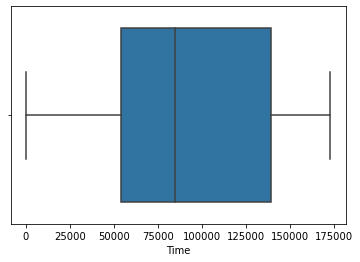

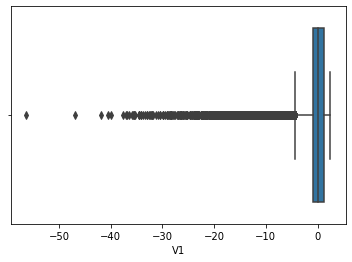

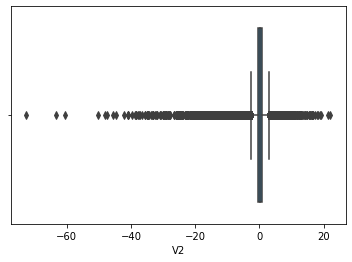

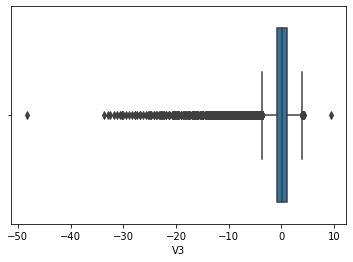

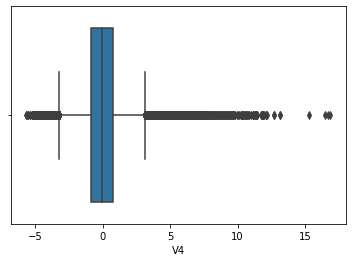

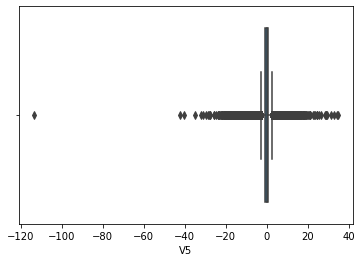

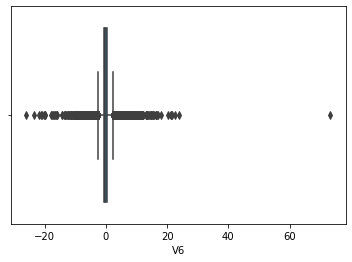

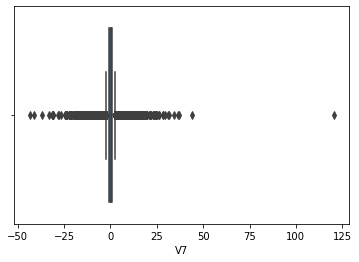

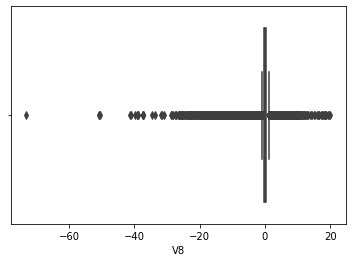

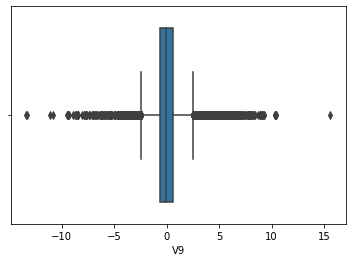

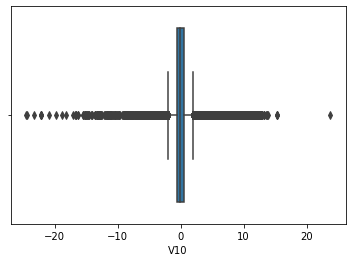

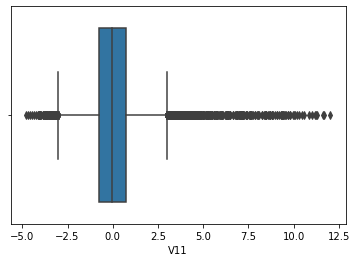

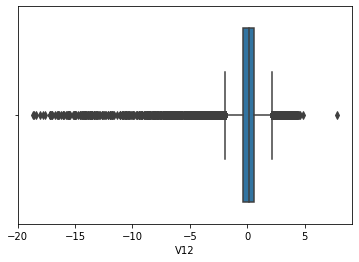

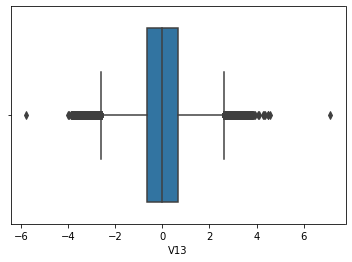

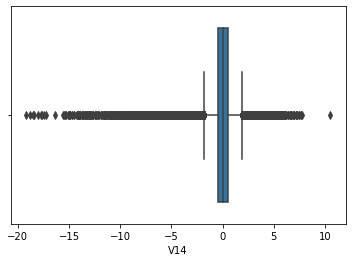

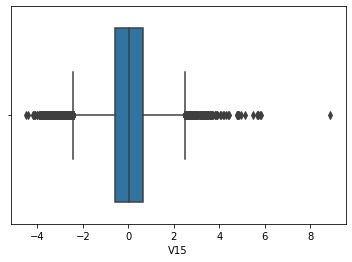

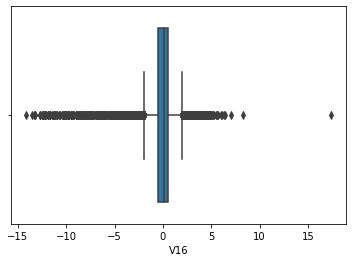

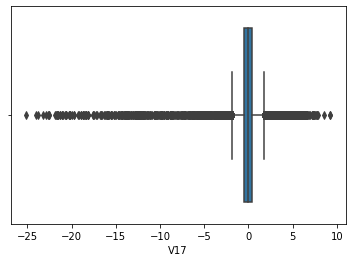

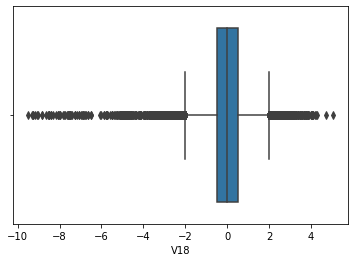

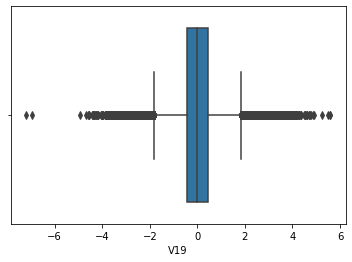

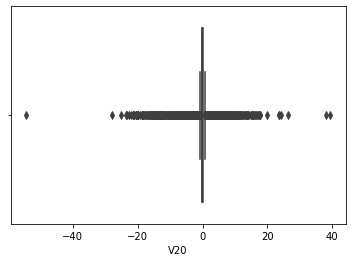

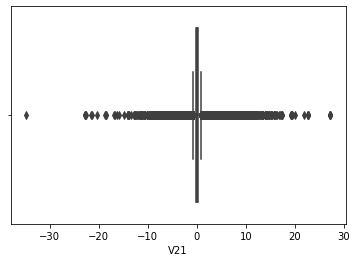

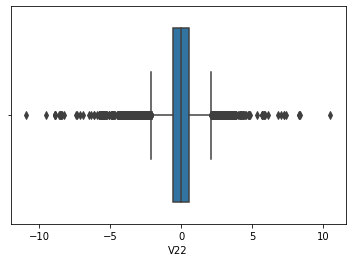

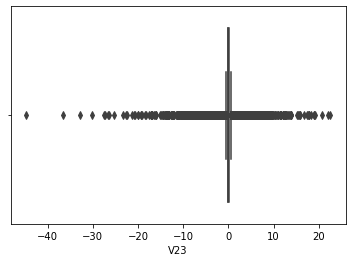

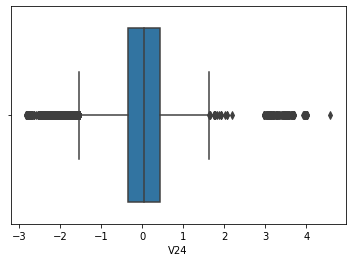

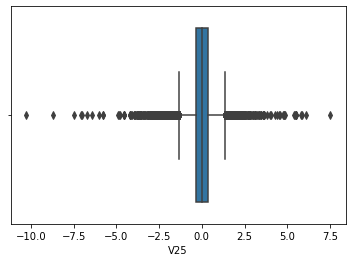

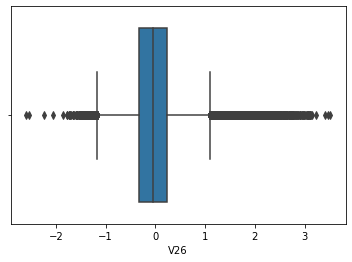

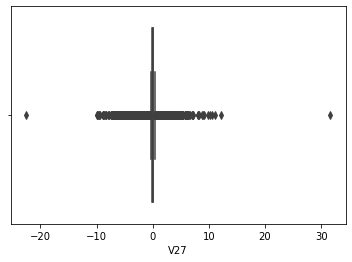

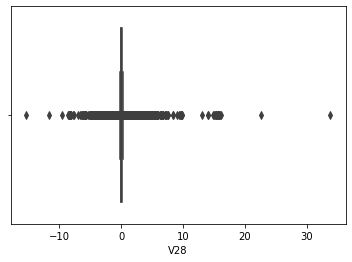

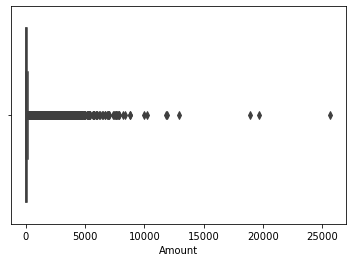

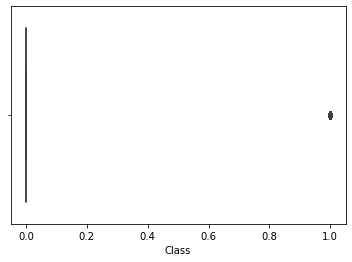

In [ ]:
from pandas.api.types import is_numeric_dtype
for item in df.columns:
    if is_numeric_dtype(df[item]):
        sns.boxplot(df[item])
        plt.show()

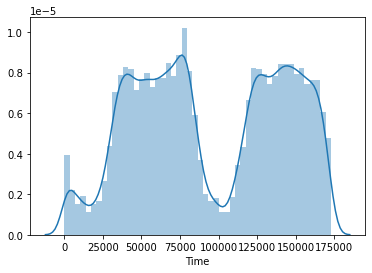

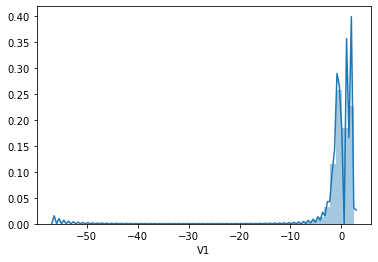

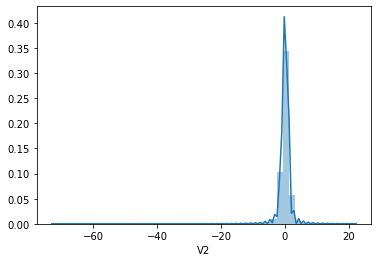

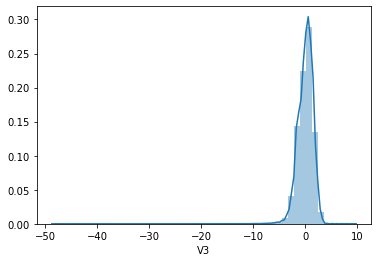

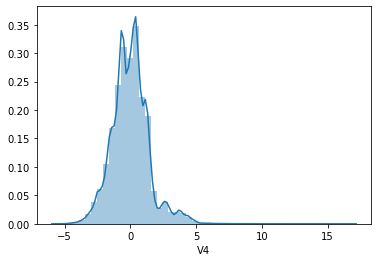

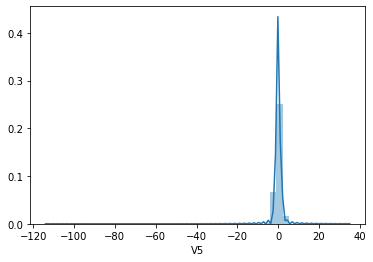

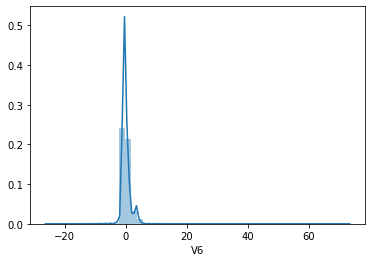

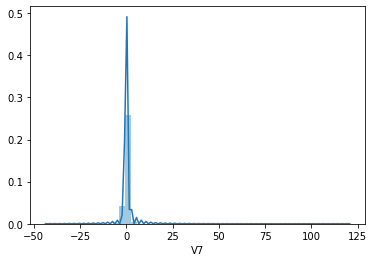

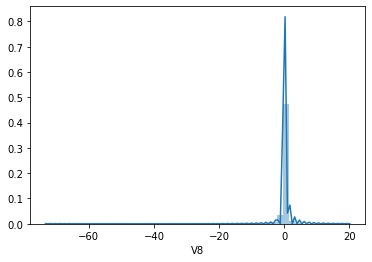

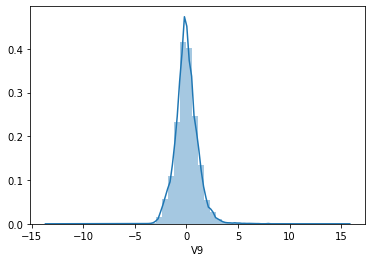

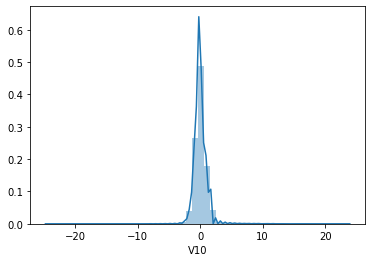

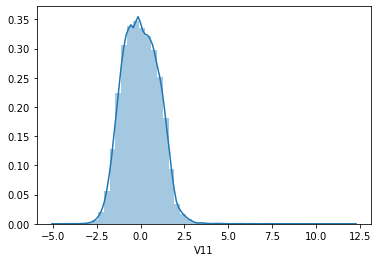

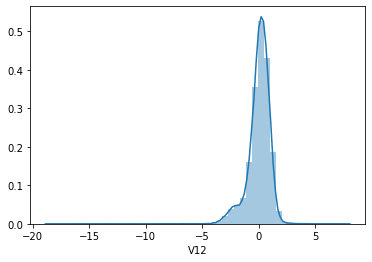

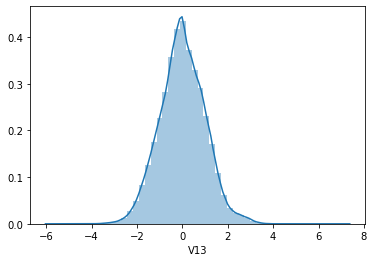

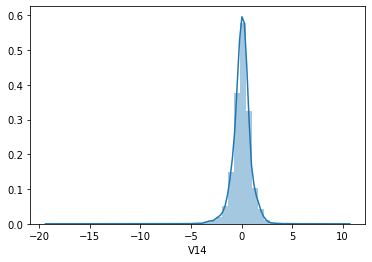

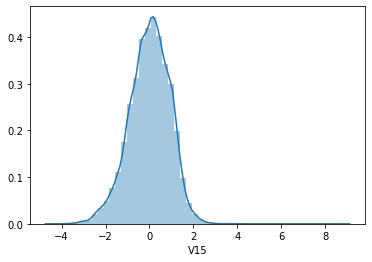

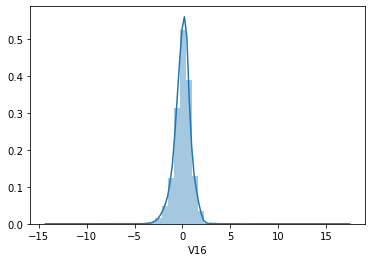

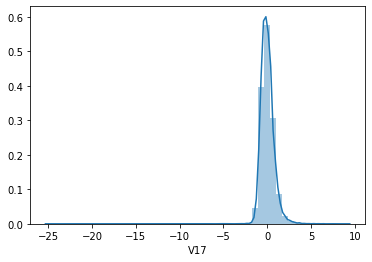

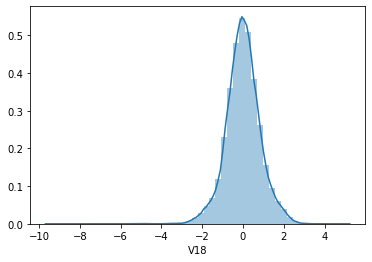

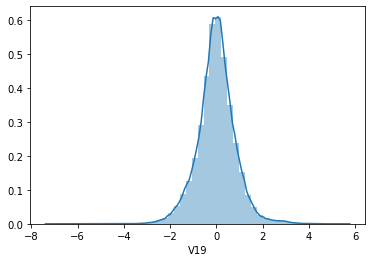

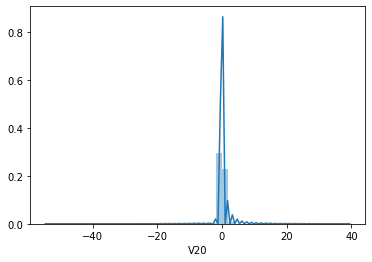

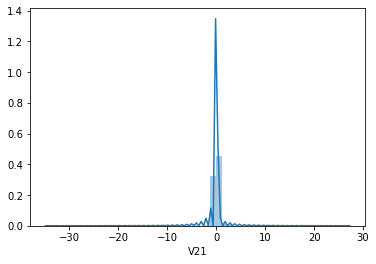

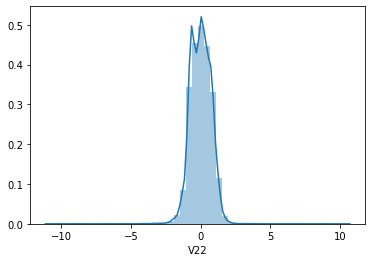

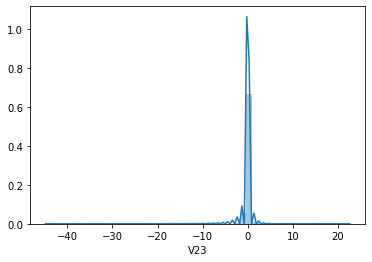

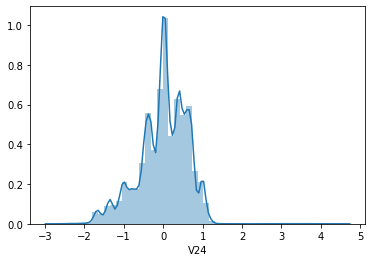

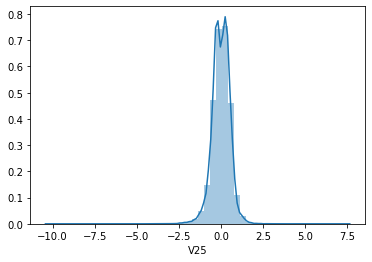

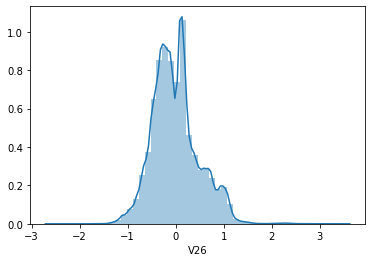

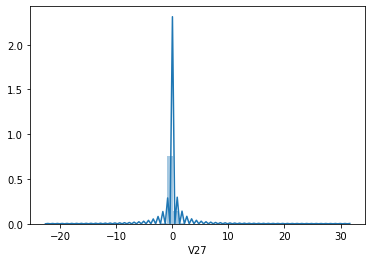

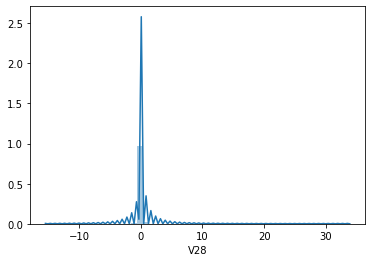

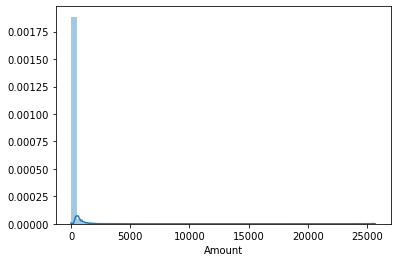

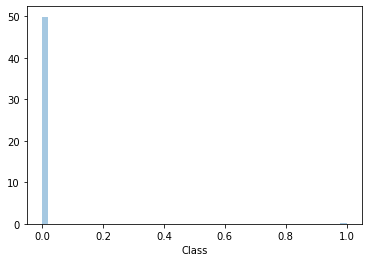

In [ ]:
from pandas.api.types import is_numeric_dtype
for item in df.columns:
    if is_numeric_dtype(df[item]):
        sns.distplot(df[item])
        plt.show()

In [ ]:
from scipy.stats import skew

In [ ]:
col = list(df.columns)
for i in col:
    print(i, skew(df[i]))

Time -0.03556743068120296
V1 -3.2806500243599563
V2 -4.624841215356954
V3 -2.2401436419416556
V4 0.6762885361363855
V5 -2.4258887193785577
V6 1.8265710448869008
V7 2.5538939666831117
V8 -8.521899311980174
V9 0.5546768505565418
V10 1.1871343376109698
V11 0.3565039778679557
V12 -2.2783889356830715
V13 0.0652331143394307
V14 -1.9951653322115102
V15 -0.30842135775467616
V16 -1.1009604775565411
V17 -3.8448942237357953
V18 -0.25987889937453285
V19 0.10919118489771402
V20 -2.0371445699300104
V21 3.5929722697554753
V22 -0.21325649967250146
V23 -5.875109397316075
V24 -0.5524963913014509
V25 -0.4157904004474158
V26 0.5766895799228516
V27 -1.1702027792556084
V28 11.19203224646587
Amount 16.97763503663315
Class 23.99745292182408


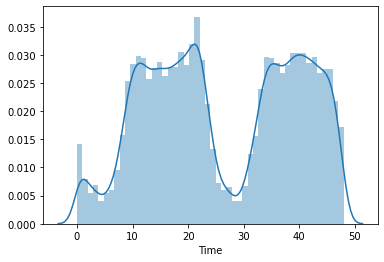

In [ ]:
# Distribution of time in terms of hours would be:
sns.distplot(df['Time']/(3600))

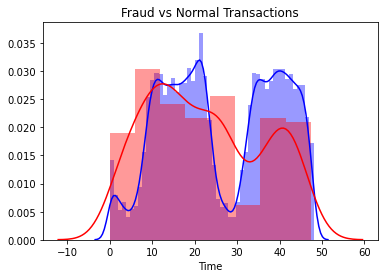

In [ ]:
sns.distplot(df[df['Class'] == 0]["Time"]/3600, color='b')
sns.distplot(df[df['Class'] == 1]["Time"]/3600, color='r')
plt.title('Fraud vs Normal Transactions')
plt.show()

The red graph indicates normal transactions wrt time in hours and blue graph indicates distribution of fradulent transactions wrt time.

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [ ]:
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


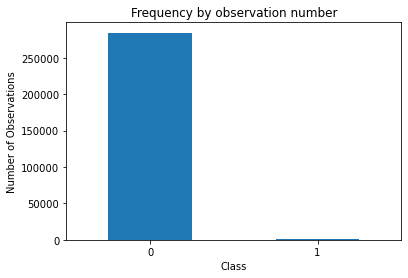

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.xlabel("Class")
plt.ylabel("Number of Observations")
classes.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

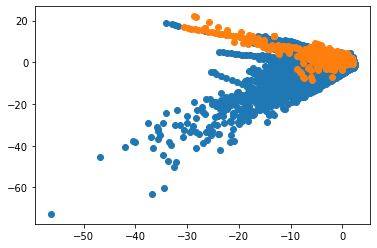

In [ ]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'])
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'])
plt.show()

In [ ]:
df1 = df.copy()
df1['Time_hrs'] = df1['Time']/3600

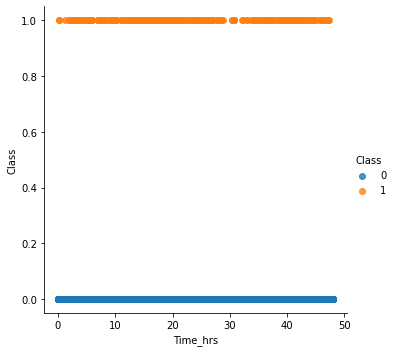

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
import seaborn as sns
sns.lmplot('Time_hrs', 'Class', df1, hue= 'Class', fit_reg=False)
plt.figure(figsize=(15, 15))
fig = plt.gcf()
plt.show()

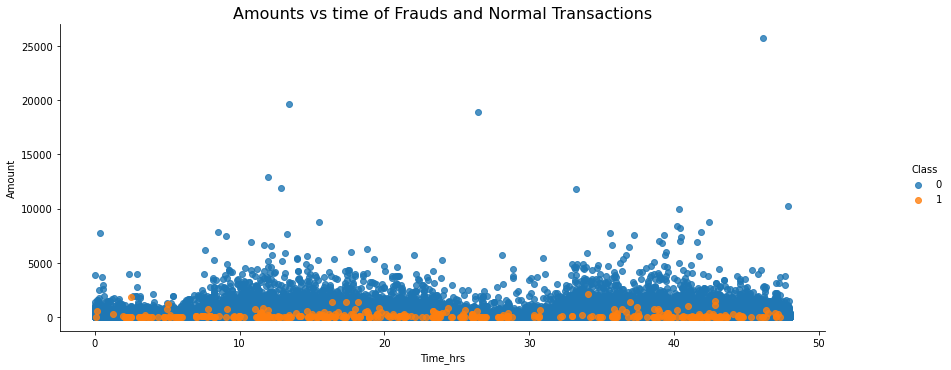

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
import seaborn as sns
sns.lmplot('Time_hrs', 'Amount', df1, hue='Class', fit_reg=False)
plt.title("Amounts vs time of Frauds and Normal Transactions",fontsize=16)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

In [ ]:
# Also, let's see the distribution of amount over classes:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

In [ ]:
df1 = df.copy()
df1['log_Amount'] = np.log(df1['Amount']+0.01)

In [ ]:
df1['log_Amount'].describe()

count    284807.000000
mean          2.960364
std           1.950786
min          -4.605170
25%           1.724551
50%           3.091497
75%           4.346076
max          10.153903
Name: log_Amount, dtype: float64

Text(0, 0.5, 'log_Amount')

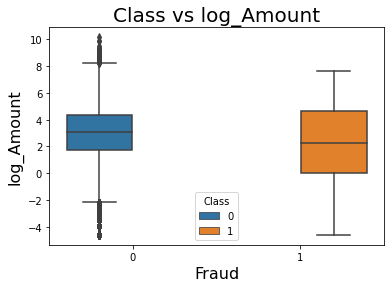

In [ ]:
pl = sns.boxplot(x ="Class",y="log_Amount",hue="Class",data=df1)
pl.set_title("Class vs log_Amount", fontsize=20)
pl.set_xlabel("Fraud", fontsize=16)
pl.set_ylabel("log_Amount", fontsize = 16)

Text(0, 0.5, 'log_Amount')

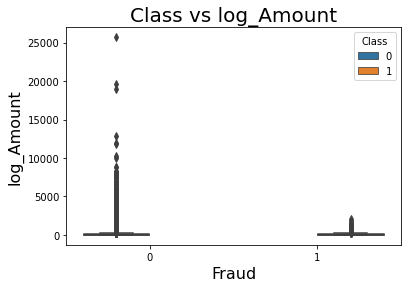

In [ ]:
pl = sns.boxplot(x="Class",y="Amount",hue="Class",data=df)
pl.set_title("Class vs log_Amount", fontsize=20)
pl.set_xlabel("Fraud", fontsize=16)
pl.set_ylabel("log_Amount", fontsize = 16)

There is a small difference in the log amounts of fraudulent and non-fradulent Classes.
Though, the IQR of fraudulent transactions is higher than normal transactions, the normal transactions have highest values

In [ ]:
fraud_case = df.Class == 1
normal_case = df.Class == 0

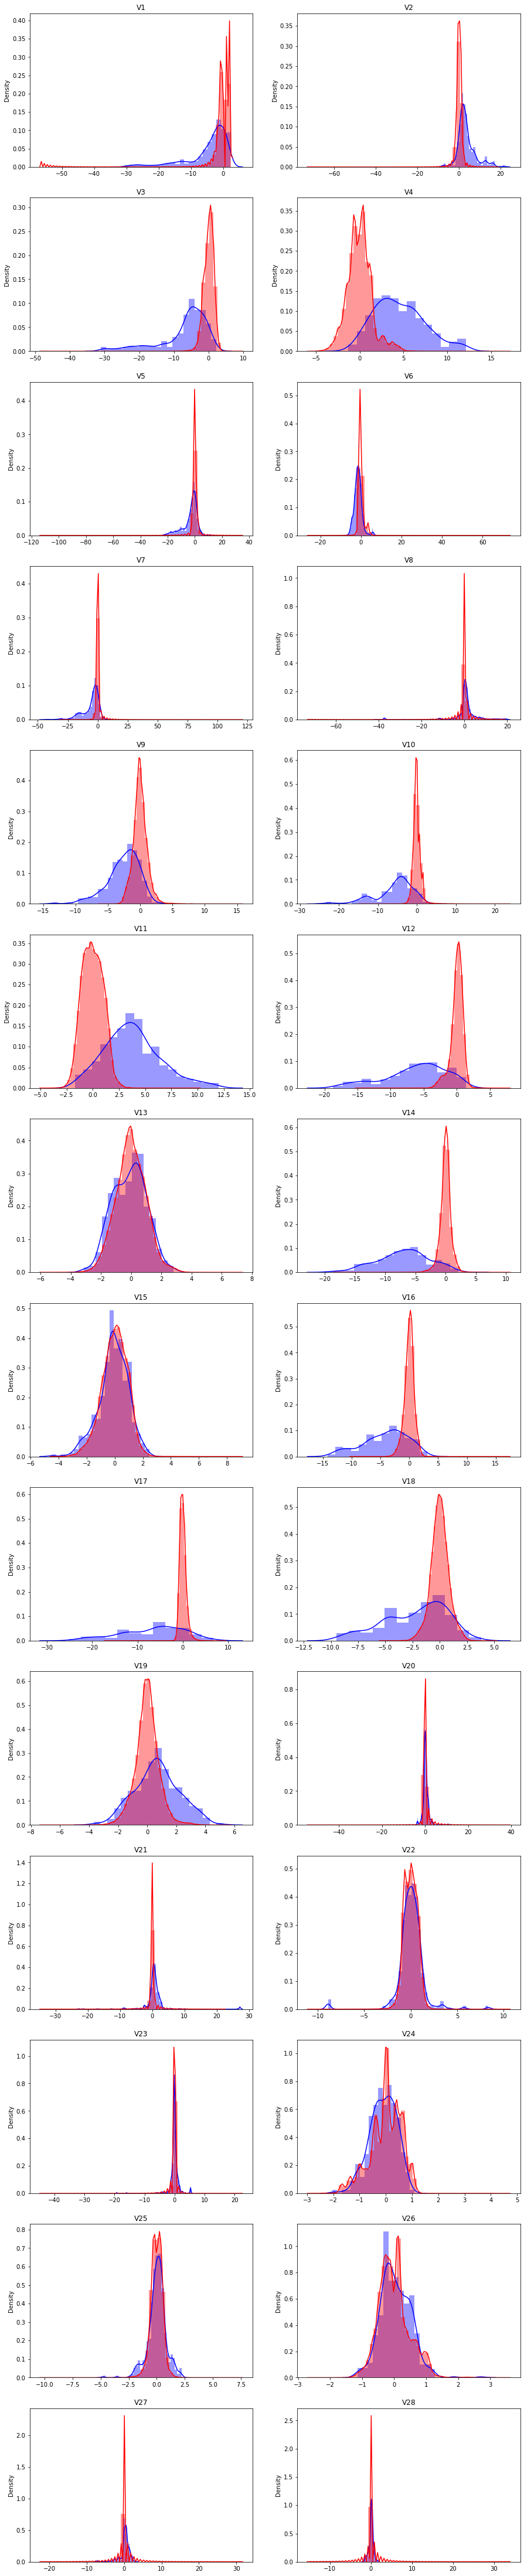

In [ ]:
#Plotting for classes vs the V's
columns = df.iloc[:,1:29].columns
import matplotlib.gridspec as gridspec
# frauds = df.Class == 1
# normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][fraud_case], color='b')
    sns.distplot(df[col][normal_case], color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [ ]:
# plt.figure(figsize = (20,20)) 
# sns.pairplot(df)
# plt.savefig("pairplot1.png")

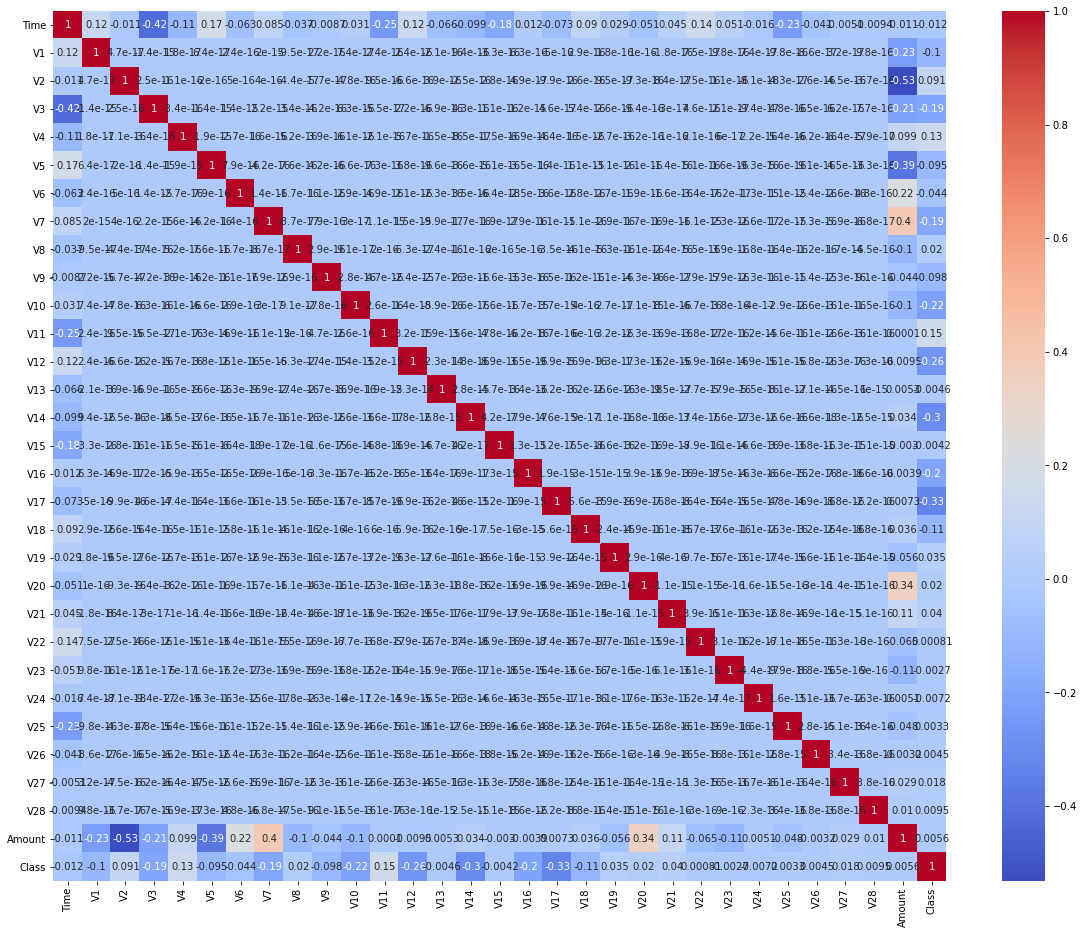

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)
plt.show()

In [ ]:
# Highly correlated values:

In [ ]:
corr_matrix = df.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [ ]:
for index, value in sol.items():
    print(index, value)

('V2', 'Amount') 0.5314089393279761
('Time', 'V3') 0.4196181722115274
('V7', 'Amount') 0.3973112781816456
('V5', 'Amount') 0.3863562561629983
('V20', 'Amount') 0.3394034045461327
('V17', 'Class') 0.32648106724269765
('V14', 'Class') 0.30254369580346246
('V12', 'Class') 0.2605929248764044
('Time', 'V11') 0.247689437486676
('Time', 'V25') 0.23308279059831727
('V1', 'Amount') 0.2277086529223733
('V10', 'Class') 0.21688294364035493
('V6', 'Amount') 0.21598118022524546
('V3', 'Amount') 0.2108804752898809
('V16', 'Class') 0.1965389403034051
('V3', 'Class') 0.19296082706681578
('V7', 'Class') 0.1872565915137108
('Time', 'V15') 0.18345327348103926
('Time', 'V5') 0.17307212331039132
('V11', 'Class') 0.15487564474346413
('Time', 'V22') 0.14405905486146361
('V4', 'Class') 0.1334474862385853
('Time', 'V12') 0.12434806837193435
('Time', 'V1') 0.11739630597839038
('V23', 'Amount') 0.11263255363252014
('V18', 'Class') 0.11148525388869356
('V21', 'Amount') 0.10599892763770487
('Time', 'V4') 0.10526020

v1, v2, v3, v4, v5, v6, v7, v8, v10, v11, v12, v14, v15, v16, v17, v18, v20, v21, v22, v23, v25, time, amount, class

We can see a interesting different distribuition in some of our features like V4, V9, V16, V17 and a lot more.
Now let's take a look on time distribuition

In [ ]:
# Drop unnecessary columns

### Splitting the data into train & test data

In [ ]:
# Putting feature variables to X
X = df1.drop(['Class','log_Amount'], axis=1)
X.head()
y= df1['Class']#class variable

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

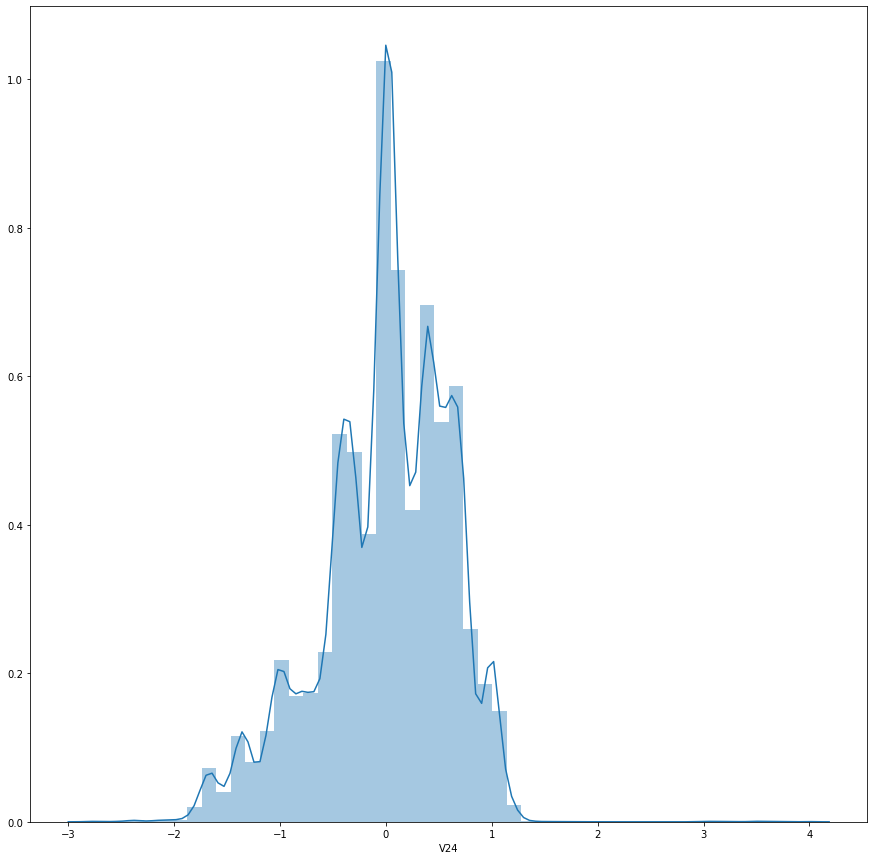

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
# Distribution of time in terms of hours would be:
plt.figure(figsize=(15,15))
sns.distplot(X_train['V24'])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize='True',copy='False')
to_scale_features = X_train.columns
X_train[to_scale_features]=pt.fit_transform(X_train[to_scale_features])
#X_test[['Amount','V24']]=pt.transform(X_test[['Amount','V24']])
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,-1.977762,0.598470,-0.076635,0.414364,0.017924,-0.150960,0.345395,-0.423005,0.053042,1.152344,...,-0.142787,-0.217742,-0.215110,0.229615,-0.518220,-0.140181,1.711153,-0.180481,-0.027825,-1.853467
190214,0.730062,1.445565,-0.134373,-0.902690,0.208193,0.136115,-0.409005,0.073299,-0.252318,0.277355,...,-0.220963,-0.355324,-0.881595,0.418801,-0.841362,-0.510193,0.511993,-0.206056,-0.220886,-1.446662
130590,-0.254749,0.843049,-0.987411,-0.652970,-1.919788,0.423178,2.278265,-1.478071,0.853644,-1.629738,...,-0.090662,-0.009865,0.104342,-0.203779,1.917859,0.990486,0.014536,0.099397,0.107899,0.706491
247916,1.193842,-0.326321,0.805913,-0.366669,-0.296532,0.512231,-0.805682,0.794658,-0.185940,0.130993,...,0.173877,-0.457294,-1.012077,0.252022,1.861162,-0.857357,0.288656,0.854371,0.473371,-1.576187
55518,-0.980315,0.566536,-0.144094,0.637616,0.445581,-0.564414,0.053504,-0.482081,0.184401,0.269297,...,-0.222159,0.013937,-0.092414,0.225649,0.287704,-0.037162,0.529867,-0.020486,0.051746,-0.715547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212912,0.923455,-0.630632,0.215177,0.615233,-1.155230,-0.623146,0.727934,-1.910661,-3.101570,-1.147246,...,0.604843,0.740673,0.762147,-1.137961,-0.636970,3.129046,0.539941,0.325097,0.516592,0.497641
65615,-0.869612,-1.383668,-1.226642,0.267430,-0.867011,0.800285,-0.825537,-0.609117,0.635746,-1.648254,...,-0.691978,-0.712798,-2.042887,1.272350,-0.641860,-1.250209,1.004134,-0.467464,-0.073802,0.282765
253799,1.242676,-1.081839,-0.417713,-0.334442,0.434180,-0.317791,0.185454,3.256841,-0.474849,-1.527315,...,1.633313,0.818014,0.746896,1.292228,-0.070097,3.463178,-0.601425,-0.618671,0.234641,1.895448
210755,0.906129,-0.460376,0.582313,0.031611,0.346307,0.443842,-0.593838,0.777128,-0.347515,0.101595,...,-0.506405,0.397357,1.203771,-0.211212,-0.135570,-0.016326,-1.245155,-0.733139,0.064881,-1.268556


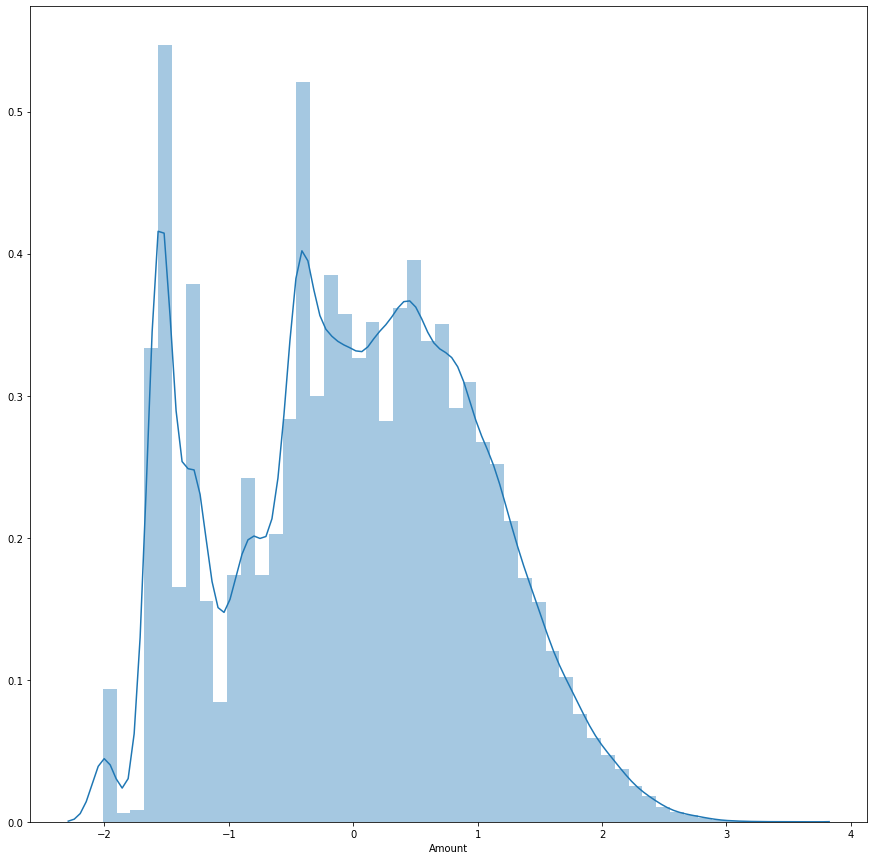

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(15,15))
sns.distplot(X_train['Amount'])

In [ ]:
# Preserving the original datasets
X_train_rf=X_train
X_test_rf=X_test
y_train_rf=y_train
y_test_rf=y_test

In [ ]:
stop 1

SyntaxError: invalid syntax (<ipython-input-42-863289bfc664>, line 1)

## Model Building- Imbalanced data:


### Imbalanced data: Logistic Regression

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
import statsmodels.api as sm

In [ ]:
# Logistic regression model
# Adding constant to the training model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199333
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -671.53
Date:                Mon, 09 Nov 2020   Deviance:                       1343.1
Time:                        16:03:30   Pearson chi2:                 5.41e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9354      0.184    -48.445      0.000      -9.297      -8.574
Time          -0.2126      0.130     -1.640      0.101      -0.467       0.041
V1            -0.0492      0.099     -0.496      0.620      -0.244       0.145
V2            -0.2657      0.084     -3.150      0.002      -0.431      -0.100
V3            -0.5295      0.112     -4.721      0.000      -0.749      -0.310
V4             0.8359      0.098      8.572      0.000       0.645       1.027
V5            -0.0463      0.083     -0.556      0.578      -0.210       0.117
V6             0.1246      0.094      1.325      0.185      -0.060       0.309
V7            -0.1755      0.071     -2.465      0.014      -0.315      -0.036
V8            -0.2569      0.059     -4.338      0.000      -0.373      -0.141
V9            -0.2960      0.101     -2.930      0.003      -0.494      -0.098
V10           -0.1041      0.094     -1.102      0.271      -0.289       0.081
V11           -0.0519      0.103     -0.505      0.614      -0.253       0.150
V12           -0.7178      0.123     -5.817      0.000      -0.960      -0.476
V13           -0.2677      0.097     -2.763      0.006      -0.458      -0.078
V14           -0.8573      0.085    -10.105      0.000      -1.024      -0.691
V15           -0.2335      0.099     -2.369      0.018      -0.427      -0.040
V16           -0.3665      0.096     -3.804      0.000      -0.555      -0.178
V17           -0.0128      0.062     -0.206      0.837      -0.135       0.109
V18            0.1418      0.103      1.377      0.168      -0.060       0.344
V19           -0.1173      0.088     -1.338      0.181      -0.289       0.055
V20           -0.0864      0.059     -1.461      0.144      -0.202       0.030
V21            0.2162      0.071      3.026      0.002       0.076       0.356
V22            0.3613      0.116      3.106      0.002       0.133       0.589
V23           -0.0704      0.044     -1.591      0.112      -0.157       0.016
V24            0.0345      0.105      0.327      0.743      -0.172       0.241
V25            0.0861      0.087      0.994      0.320      -0.084       0.256
V26           -0.0621      0.117     -0.529      0.597      -0.292       0.168
V27           -0.0833      0.056     -1.493      0.136      -0.193       0.026
V28           -0.0626      0.034     -1.863      0.062      -0.128       0.003
Amount        -0.0098      0.106     -0.092      0.926      -0.218       0.198
==============================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True, False, False,  True,  True, False, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Time', True, 1),
 ('V1', False, 17),
 ('V2', False, 4),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 16),
 ('V6', False, 6),
 ('V7', False, 5),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', False, 13),
 ('V11', False, 18),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', False, 20),
 ('V18', False, 9),
 ('V19', False, 7),
 ('V20', False, 14),
 ('V21', False, 3),
 ('V22', False, 2),
 ('V23', False, 11),
 ('V24', False, 19),
 ('V25', False, 10),
 ('V26', False, 8),
 ('V27', False, 12),
 ('V28', False, 15),
 ('Amount', False, 21)]

In [ ]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['V1', 'V2', 'V5', 'V6', 'V7', 'V10', 'V11', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199353
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -688.62
Date:                Mon, 09 Nov 2020   Deviance:                       1377.2
Time:                        16:03:42   Pearson chi2:                 7.25e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8165      0.159    -55.443      0.000      -9.128      -8.505
Time          -0.1689      0.107     -1.583      0.113      -0.378       0.040
V3            -0.4952      0.089     -5.542      0.000      -0.670      -0.320
V4             0.7949      0.093      8.559      0.000       0.613       0.977
V8            -0.2982      0.035     -8.627      0.000      -0.366      -0.230
V9            -0.2574      0.076     -3.386      0.001      -0.406      -0.108
V12           -0.7433      0.112     -6.608      0.000      -0.964      -0.523
V13           -0.2616      0.092     -2.846      0.004      -0.442      -0.081
V14           -0.8210      0.061    -13.519      0.000      -0.940      -0.702
V15           -0.3225      0.092     -3.490      0.000      -0.504      -0.141
V16           -0.4394      0.059     -7.436      0.000      -0.555      -0.324
==============================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7610      0.000028
190214    0.000061
130590    0.000105
247916    0.000314
55518     0.000052
147392    0.000674
5549      0.000135
182927    0.000065
177760    0.000017
266732    0.000190
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.78662654e-05, 6.13866839e-05, 1.04970566e-04, 3.13855242e-04,
       5.16391982e-05, 6.74184782e-04, 1.34893232e-04, 6.51098437e-05,
       1.69448093e-05, 1.90225742e-04])

In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.000028,7610
1,0,0.000061,190214
2,0,0.000105,130590
3,0,0.000314,247916
4,0,0.000052,55518


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted
0,0,0.000028,7610,0
1,0,0.000061,190214,0
2,0,0.000105,130590,0
3,0,0.000314,247916,0
4,0,0.000052,55518,0


In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

[[198988     26]
 [   109    241]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

0.9993228466523545


In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Time,1.38
1,V3,1.30
7,V14,1.05
8,V15,1.05
5,V12,1.04
2,V4,1.02
3,V8,1.02
6,V13,1.02
4,V9,1.01
9,V16,1.01


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6885714285714286

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9998693559247088

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.00013064407529118555


In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.00013064407529118555


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.9026217228464419


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9994525281646635


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000028,7610,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000061,190214,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000105,130590,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000314,247916,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000052,55518,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001756  1.000000  0.000000
0.1   0.1  0.999343  0.814286  0.999668
0.2   0.2  0.999368  0.791429  0.999734
0.3   0.3  0.999398  0.757143  0.999824
0.4   0.4  0.999383  0.737143  0.999844
0.5   0.5  0.999323  0.688571  0.999869
0.6   0.6  0.999293  0.654286  0.999900
0.7   0.7  0.999228  0.614286  0.999905
0.8   0.8  0.999172  0.582857  0.999905
0.9   0.9  0.999102  0.542857  0.999905


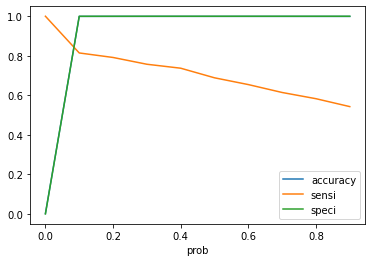

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

print(thresholds)

[1.99999999e+00 9.99999986e-01 9.99999979e-01 ... 7.47133121e-13
 2.84865447e-13 1.44968544e-14]


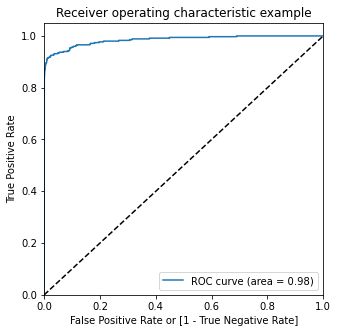

In [ ]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000028,7610,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000061,190214,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000105,130590,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000314,247916,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000052,55518,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.9993429104552477

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[198948,     66],
       [    65,    285]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8142857142857143

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9996683650396454

In [ ]:
# Scaling the data
to_scale_features = X_train.columns
X_test[to_scale_features] = pt.transform(X_test[to_scale_features])
X_test = X_test[col]
X_test.head()

,Time,V3,V4,V8,V9,V12,V13,V14,V15,V16
49089,-1.054492,-0.560895,0.369676,1.063597,0.711001,0.306255,-0.253320,-0.371748,-0.855520,-0.314360
154704,0.222816,-1.748593,-0.025081,0.730088,1.695301,-2.004819,1.248858,-0.141118,-0.825584,-0.067886
67247,-0.851896,0.531532,0.346459,0.233140,0.958128,1.044915,-1.105159,-0.139909,-0.710575,-0.303358
251657,1.224890,-1.050062,0.196123,-0.282835,0.655353,-0.314866,-0.200860,0.266315,0.180992,0.109783
201903,0.830829,-1.467842,3.067119,-0.318009,-1.929774,-1.086679,0.478501,-2.535899,0.190638,0.348483


In [ ]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Time,V3,V4,V8,V9,V12,V13,V14,V15,V16
49089,1.0,-1.054492,-0.560895,0.369676,1.063597,0.711001,0.306255,-0.253320,-0.371748,-0.855520,-0.314360
154704,1.0,0.222816,-1.748593,-0.025081,0.730088,1.695301,-2.004819,1.248858,-0.141118,-0.825584,-0.067886
67247,1.0,-0.851896,0.531532,0.346459,0.233140,0.958128,1.044915,-1.105159,-0.139909,-0.710575,-0.303358
251657,1.0,1.224890,-1.050062,0.196123,-0.282835,0.655353,-0.314866,-0.200860,0.266315,0.180992,0.109783
201903,1.0,0.830829,-1.467842,3.067119,-0.318009,-1.929774,-1.086679,0.478501,-2.535899,0.190638,0.348483
...,...,...,...,...,...,...,...,...,...,...,...
227071,1.0,1.032485,0.826684,-0.319556,0.643354,-0.007988,0.407236,-0.510144,0.508171,-0.084330,0.389017
161101,1.0,0.444301,0.316594,-1.833494,1.083463,0.081887,1.244570,0.357097,0.266717,0.511509,-0.015012
45955,1.0,-1.086816,0.303394,-1.132666,-0.538492,-0.846737,-0.144965,0.405838,-0.659728,-0.094028,1.688832
32565,1.0,-1.229090,0.020215,0.923765,-0.613076,-0.652317,0.002184,1.378743,0.005596,1.355745,-0.997582


In [ ]:
y_test_pred = res.predict(X_test_sm)
y_test_pred

49089     0.000332
154704    0.000835
67247     0.000125
251657    0.000210
201903    0.065957
            ...   
227071    0.000026
161101    0.000005
45955     0.000077
32565     0.000371
283008    0.000015
Length: 85443, dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
49089,0.000332
154704,0.000835
67247,0.000125
251657,0.000210
201903,0.065957


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

,Class,CustID
49089,0,49089
154704,0,154704
67247,0,67247
251657,0,251657
201903,0,201903
...,...,...
227071,0,227071
161101,0,161101
45955,0,45955
32565,0,32565


In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Class,CustID,0
0,0,49089,0.000332
1,0,154704,0.000835
2,0,67247,0.000125
3,0,251657,0.000210
4,0,201903,0.065957


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})
y_pred_final.head()

,Class,CustID,Fraud_Prob
0,0,49089,0.000332
1,0,154704,0.000835
2,0,67247,0.000125
3,0,251657,0.000210
4,0,201903,0.065957


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Class','Fraud_Prob'], axis=1)
y_pred_final.head()

,CustID,Class,Fraud_Prob
0,49089,0,0.000332
1,154704,0,0.000835
2,67247,0,0.000125
3,251657,0,0.000210
4,201903,0,0.065957


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9990519995786665

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )
confusion2

array([[85251,    50],
       [   31,   111]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7816901408450704

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9994138404004642

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

0.6894409937888198

In [ ]:
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

0.7816901408450704

## Imbalanced data: Random Forest

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [ ]:
# Making predictions
predictions = rfc.predict(X_test_rf)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test_rf,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.78      0.76      0.77       142

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test_rf,predictions))

[[85270    31]
 [   34   108]]


In [ ]:
print(accuracy_score(y_test_rf,predictions))

0.9992392589211521


In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200], 
    'max_features': [5,10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 200),
                         'n_estimators': [100, 200]},
             verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9991874166621016 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [ ]:
# predict
predictions = rfc.predict(X_test_rf)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.74      0.70      0.72       142

    accuracy                           1.00     85443
   macro avg       0.87      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print(confusion_matrix(y_test,predictions))

[[85266    35]
 [   43    99]]


Best Threshold=0.261690


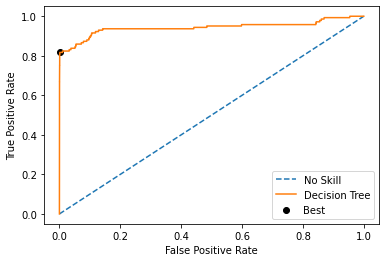

In [ ]:
# predict probabilities
y_pred_prob = rfc.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = rfc.predict(X_test_rf)
print(classification_report(y_test_rf, y_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.52      0.81      0.63       142

    accuracy                           1.00     85443
   macro avg       0.76      0.90      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# confusion matrix
print(confusion_matrix(y_test_rf,y_class))

[[85193   108]
 [   27   115]]


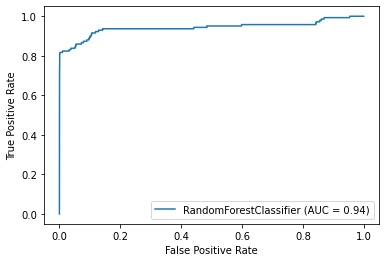

In [ ]:
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(rfc, X_test_rf, y_test_rf)
plt.show()




In [ ]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = rfc.predict_proba(X_test_rf)
y_pred[:10]

array([[9.99886170e-01, 1.13830229e-04],
       [9.98095408e-01, 1.90459198e-03],
       [9.98894468e-01, 1.10553222e-03],
       [9.99906214e-01, 9.37864165e-05],
       [9.76387080e-01, 2.36129197e-02],
       [9.97890138e-01, 2.10986237e-03],
       [9.98881758e-01, 1.11824176e-03],
       [9.98874985e-01, 1.12501506e-03],
       [9.97749985e-01, 2.25001461e-03],
       [9.98872326e-01, 1.12767429e-03]])

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 94.26%


In [ ]:
precision = precision_score(y_test_rf, y_class, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.516


In [ ]:
recall = recall_score(y_test_rf, y_class, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.810


In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test_rf, y_class, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.630


## Imbalanced data: Decision Tree

In [ ]:
# Create the parameter grid 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rf,y_train_rf)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.0min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.952880,0.232010,0.008439,0.000941,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.999273,0.999147,0.999147,0.999348,0.999022,0.999187,0.000113,1
1,3.811299,0.112302,0.007883,0.000456,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.999273,0.999147,0.999147,0.999348,0.999022,0.999187,0.000113,1
2,4.308429,0.312815,0.008581,0.000467,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.999197,0.998997,0.999122,0.999197,0.999298,0.999162,0.000100,5
3,3.845738,0.169799,0.008224,0.000906,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.999197,0.998997,0.999122,0.999197,0.999298,0.999162,0.000100,5
4,5.441977,0.485891,0.008444,0.000450,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.999273,0.999147,0.999147,0.999348,0.999022,0.999187,0.000113,1
5,5.439588,0.586649,0.008222,0.000242,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.999273,0.999147,0.999147,0.999348,0.999022,0.999187,0.000113,1
6,5.240335,0.354947,0.008158,0.000312,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.999197,0.998997,0.999122,0.999197,0.999298,0.999162,0.000100,5
7,5.348850,0.419883,0.008109,0.000190,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.999197,0.998997,0.999122,0.999197,0.999298,0.999162,0.000100,5
8,2.924164,0.153656,0.007372,0.000346,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.999172,0.998972,0.999147,0.999147,0.999097,0.999107,0.000072,13
9,2.951294,0.128078,0.007572,0.000167,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.999172,0.998972,0.999147,0.999147,0.999097,0.999107,0.000072,13


In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9991874151524589
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_rf, y_train_rf)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
# accuracy score
clf_gini.score(X_test_rf,y_test_rf)

0.9990051847430451

In [ ]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [50,60],
          "dtree__min_samples_leaf": [50,60]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = GridSearchCV(estimator=pipe, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)




In [ ]:
# Fit the grid search to the data
dtree_grid.fit(X_train_rf,y_train_rf)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('dtree',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [5, 6],
                         'dtree__min_samples_leaf': [50, 60],
                         'dtree__min_samples_split': [50, 60]},
             scoring='roc_auc', verbose=1)

In [ ]:
# We automatically get the DT with the best parameters.
dtree_grid.best_estimator_

Pipeline(steps=[('dtree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5,
                                        min_samples_leaf=60,
                                        min_samples_split=50,
                                        random_state=42))])

In [ ]:
# print best hyperparameters
print("Best Recall: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best Recall:  0.9336186905301911
Best hyperparameters:  {'dtree__criterion': 'entropy', 'dtree__max_depth': 5, 'dtree__min_samples_leaf': 60, 'dtree__min_samples_split': 50}


Best Threshold=0.673488


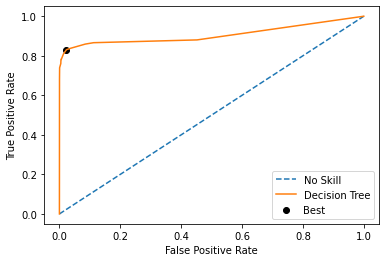

In [ ]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test_rf)
print(classification_report(y_test_rf, y_class))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.09      0.81      0.16       142

    accuracy                           0.99     85443
   macro avg       0.55      0.90      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
# confusion matrix
print(confusion_matrix(y_test_rf,y_class))

[[84148  1153]
 [   27   115]]


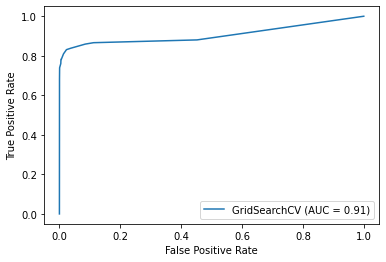

In [ ]:
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(dtree_grid, X_test_rf, y_test_rf)
plt.show()

In [ ]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = dtree_grid.predict_proba(X_test_rf)
y_pred[:10]

array([[0.98040393, 0.01959607],
       [0.98040393, 0.01959607],
       [0.98040393, 0.01959607],
       [0.98040393, 0.01959607],
       [1.        , 0.        ],
       [0.98040393, 0.01959607],
       [1.        , 0.        ],
       [0.98040393, 0.01959607],
       [0.61654446, 0.38345554],
       [0.98040393, 0.01959607]])

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 90.60%


In [ ]:
precision = precision_score(y_test_rf, y_class, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.091


In [ ]:
recall = recall_score(y_test_rf, y_class, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.810


In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test_rf, y_class, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.163


## Imbalanced data: XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_rf, y_train_rf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test_rf)
y_pred[:10]

array([[9.9999243e-01, 7.5861490e-06],
       [9.9995768e-01, 4.2289535e-05],
       [9.9999857e-01, 1.4235619e-06],
       [9.9999923e-01, 7.5396116e-07],
       [9.9474543e-01, 5.2545825e-03],
       [9.9999827e-01, 1.7498536e-06],
       [9.9999607e-01, 3.9171368e-06],
       [9.9998170e-01, 1.8293422e-05],
       [9.9997532e-01, 2.4674055e-05],
       [9.9998397e-01, 1.6049362e-05]], dtype=float32)

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 96.00%


In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6],
             'max_depth':[2,4,8],
             'n_estimators':[100,200]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [ ]:
# fit the model
model_cv.fit(X_train_rf, y_train_rf) 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 12.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.781787,0.357166,0.110804,0.004279,0.2,2,100,0.3,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.984429,0.963481,0.970101,0.972670,0.008743,11,0.998256,0.999113,0.999059,0.998810,3.917830e-04
1,4.570214,0.170390,0.094230,0.001655,0.2,2,100,0.6,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.985307,0.968256,0.977751,0.977105,0.006976,3,0.997847,0.999692,0.998879,0.998806,7.553052e-04
2,7.391843,0.168681,0.129158,0.009319,0.2,2,200,0.3,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.977801,0.955372,0.975287,0.969486,0.010033,17,0.999738,0.999957,0.999877,0.999858,9.038919e-05
3,9.931602,0.698933,0.127015,0.007169,0.2,2,200,0.6,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.982045,0.967886,0.980657,0.976863,0.006373,4,0.999968,0.999996,0.999883,0.999949,4.804176e-05
4,6.042585,0.280274,0.123063,0.003726,0.2,4,100,0.3,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.979864,0.968369,0.968819,0.972351,0.005316,12,0.999834,0.999900,0.999886,0.999873,2.868896e-05
5,8.420342,0.029659,0.124344,0.003673,0.2,4,100,0.6,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.982328,0.967199,0.974577,0.974701,0.006177,5,0.999977,0.999999,0.999999,0.999992,1.073707e-05
6,14.311779,1.089150,0.237124,0.028099,0.2,4,200,0.3,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.970746,0.966308,0.973432,0.970162,0.002938,15,0.999997,1.000000,0.999999,0.999999,9.580846e-07
7,26.702261,0.394409,0.256546,0.026433,0.2,4,200,0.6,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.981872,0.965820,0.973553,0.973748,0.006555,7,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,9.408592,1.287846,0.168981,0.017610,0.2,8,100,0.3,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.984782,0.967740,0.968436,0.973653,0.007875,8,0.999902,0.999948,0.999887,0.999912,2.575283e-05
9,11.886294,1.711900,0.137030,0.006710,0.2,8,100,0.6,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.990186,0.965900,0.975262,0.977116,0.010001,2,0.999996,1.000000,1.000000,0.999999,1.704686e-06


In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.781787,0.357166,0.110804,0.004279,0.2,2,100,0.3,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.984429,0.963481,0.970101,0.972670,0.008743,11,0.998256,0.999113,0.999059,0.998810,0.000392
1,4.570214,0.170390,0.094230,0.001655,0.2,2,100,0.6,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.985307,0.968256,0.977751,0.977105,0.006976,3,0.997847,0.999692,0.998879,0.998806,0.000755
2,7.391843,0.168681,0.129158,0.009319,0.2,2,200,0.3,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.977801,0.955372,0.975287,0.969486,0.010033,17,0.999738,0.999957,0.999877,0.999858,0.000090
3,9.931602,0.698933,0.127015,0.007169,0.2,2,200,0.6,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.982045,0.967886,0.980657,0.976863,0.006373,4,0.999968,0.999996,0.999883,0.999949,0.000048
4,6.042585,0.280274,0.123063,0.003726,0.2,4,100,0.3,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.979864,0.968369,0.968819,0.972351,0.005316,12,0.999834,0.999900,0.999886,0.999873,0.000029


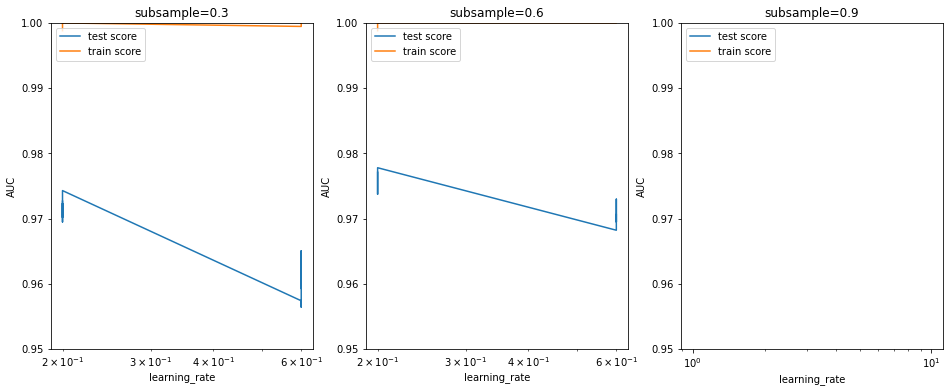

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.95, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    #plt.show()
    plt.xscale('log')

In [ ]:
 # chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 8, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_rf, y_train_rf)

[17:18:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Best Threshold=0.000332


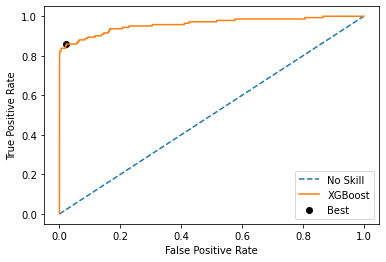

In [ ]:
# predict probabilities
y_pred_prob = model.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# roc_auc
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
auc

0.9599564656788695

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.74      0.78      0.76       142

    accuracy                           1.00     85443
   macro avg       0.87      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test_rf,y_pred))

[[85261    40]
 [   31   111]]


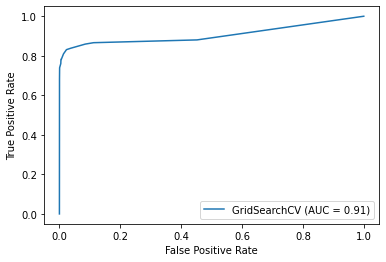

array([[0.98040393, 0.01959607],
       [0.98040393, 0.01959607],
       [0.98040393, 0.01959607],
       [0.98040393, 0.01959607],
       [1.        , 0.        ],
       [0.98040393, 0.01959607],
       [1.        , 0.        ],
       [0.98040393, 0.01959607],
       [0.61654446, 0.38345554],
       [0.98040393, 0.01959607]])

In [ ]:
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(dtree_grid, X_test_rf, y_test_rf)
plt.show()

# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = dtree_grid.predict_proba(X_test_rf)
y_pred[:10]

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test_rf, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 90.60%


In [ ]:
precision = precision_score(y_test_rf, y_class, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.058


In [ ]:
recall = recall_score(y_test_rf, y_class, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.852


In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test_rf, y_class, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.109


In [ ]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'Time': 0.015846353,
 'V1': 0.022862455,
 'V2': 0.017069262,
 'V3': 0.014568366,
 'V4': 0.025293117,
 'V5': 0.0153940255,
 'V6': 0.012965688,
 'V7': 0.028954526,
 'V8': 0.01856359,
 'V9': 0.012683213,
 'V10': 0.04988403,
 'V11': 0.01967793,
 'V12': 0.034332685,
 'V13': 0.01781381,
 'V14': 0.074080914,
 'V15': 0.017928116,
 'V16': 0.016711522,
 'V17': 0.37670165,
 'V18': 0.019471467,
 'V19': 0.012931856,
 'V20': 0.016691279,
 'V21': 0.024882304,
 'V22': 0.011629536,
 'V23': 0.013080686,
 'V24': 0.011294077,
 'V25': 0.017192949,
 'V26': 0.019356476,
 'V27': 0.02904575,
 'V28': 0.019029398,
 'Amount': 0.014063006}

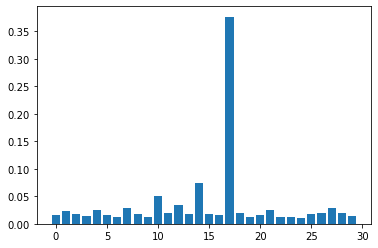

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
# class imbalance
y_train_rf.value_counts()/y_train_rf.shape

0    0.998244
1    0.001756
Name: Class, dtype: float64

### BALANCING TECHNIQUE 1 : UNIFORM OVERSAMPLING

## Uniform Oversampling- Logistic Regression

In [ ]:
from imblearn import over_sampling

In [ ]:
X_train_lr = X_train_rf.copy()
X_test_lr = X_test_rf.copy()
y_train_lr = y_train_rf.copy()
y_test_lr = y_test_rf.copy()

In [ ]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199333
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -671.53
Date:                Mon, 09 Nov 2020   Deviance:                       1343.1
Time:                        17:23:21   Pearson chi2:                 5.41e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9354      0.184    -48.445      0.000      -9.297      -8.574
Time          -0.2126      0.130     -1.640      0.101      -0.467       0.041
V1            -0.0492      0.099     -0.496      0.620      -0.244       0.145
V2            -0.2657      0.084     -3.150      0.002      -0.431      -0.100
V3            -0.5295      0.112     -4.721      0.000      -0.749      -0.310
V4             0.8359      0.098      8.572      0.000       0.645       1.027
V5            -0.0463      0.083     -0.556      0.578      -0.210       0.117
V6             0.1246      0.094      1.325      0.185      -0.060       0.309
V7            -0.1755      0.071     -2.465      0.014      -0.315      -0.036
V8            -0.2569      0.059     -4.338      0.000      -0.373      -0.141
V9            -0.2960      0.101     -2.930      0.003      -0.494      -0.098
V10           -0.1041      0.094     -1.102      0.271      -0.289       0.081
V11           -0.0519      0.103     -0.505      0.614      -0.253       0.150
V12           -0.7178      0.123     -5.817      0.000      -0.960      -0.476
V13           -0.2677      0.097     -2.763      0.006      -0.458      -0.078
V14           -0.8573      0.085    -10.105      0.000      -1.024      -0.691
V15           -0.2335      0.099     -2.369      0.018      -0.427      -0.040
V16           -0.3665      0.096     -3.804      0.000      -0.555      -0.178
V17           -0.0128      0.062     -0.206      0.837      -0.135       0.109
V18            0.1418      0.103      1.377      0.168      -0.060       0.344
V19           -0.1173      0.088     -1.338      0.181      -0.289       0.055
V20           -0.0864      0.059     -1.461      0.144      -0.202       0.030
V21            0.2162      0.071      3.026      0.002       0.076       0.356
V22            0.3613      0.116      3.106      0.002       0.133       0.589
V23           -0.0704      0.044     -1.591      0.112      -0.157       0.016
V24            0.0345      0.105      0.327      0.743      -0.172       0.241
V25            0.0861      0.087      0.994      0.320      -0.084       0.256
V26           -0.0621      0.117     -0.529      0.597      -0.292       0.168
V27           -0.0833      0.056     -1.493      0.136      -0.193       0.026
V28           -0.0626      0.034     -1.863      0.062      -0.128       0.003
Amount        -0.0098      0.106     -0.092      0.926      -0.218       0.198
==============================================================================
"""

In [ ]:
# grid_log_reg.fit(X_train, y_train)
logreg = LogisticRegression(random_state = 42, class_weight = 'balanced')

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train_lr, y_train_lr)

In [ ]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [ ]:
list(zip(X_train_lr.columns, rfe.support_, rfe.ranking_))

[('Time', True, 1),
 ('V1', False, 5),
 ('V2', True, 1),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 11),
 ('V6', False, 2),
 ('V7', False, 7),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', False, 8),
 ('V19', False, 12),
 ('V20', False, 14),
 ('V21', False, 9),
 ('V22', True, 1),
 ('V23', False, 16),
 ('V24', False, 15),
 ('V25', False, 6),
 ('V26', False, 3),
 ('V27', False, 4),
 ('V28', False, 10),
 ('Amount', False, 13)]

In [ ]:
col = X_train_lr.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['V1', 'V5', 'V6', 'V7', 'V18', 'V19', 'V20', 'V21', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train_lr[col])
logm2 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199348
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -684.04
Date:                Mon, 09 Nov 2020   Deviance:                       1368.1
Time:                        17:23:30   Pearson chi2:                 1.00e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7899      0.169    -51.887      0.000      -9.122      -8.458
Time          -0.1910      0.118     -1.617      0.106      -0.423       0.041
V2            -0.0904      0.065     -1.393      0.164      -0.218       0.037
V3            -0.4540      0.103     -4.399      0.000      -0.656      -0.252
V4             0.7723      0.094      8.220      0.000       0.588       0.956
V8            -0.2510      0.047     -5.294      0.000      -0.344      -0.158
V9            -0.2397      0.089     -2.689      0.007      -0.414      -0.065
V10           -0.0806      0.068     -1.191      0.234      -0.213       0.052
V11           -0.0142      0.099     -0.144      0.886      -0.208       0.179
V12           -0.7242      0.119     -6.086      0.000      -0.957      -0.491
V13           -0.2899      0.094     -3.087      0.002      -0.474      -0.106
V14           -0.8600      0.077    -11.163      0.000      -1.011      -0.709
V15           -0.3289      0.094     -3.484      0.000      -0.514      -0.144
V16           -0.3621      0.085     -4.270      0.000      -0.528      -0.196
V17           -0.0197      0.046     -0.424      0.672      -0.111       0.071
V22            0.1811      0.102      1.771      0.077      -0.019       0.382
==============================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7610      0.000025
190214    0.000051
130590    0.000111
247916    0.000258
55518     0.000057
147392    0.000538
5549      0.000108
182927    0.000068
177760    0.000022
266732    0.000180
dtype: float64

In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
7610,0,0.000025,7610
190214,0,0.000051,190214
130590,0,0.000111,130590
247916,0,0.000258,247916
55518,0,0.000057,55518


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted
7610,0,0.000025,7610,0
190214,0,0.000051,190214,0
130590,0,0.000111,130590,0
247916,0,0.000258,247916,0
55518,0,0.000057,55518,0


In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

[[198992     22]
 [   107    243]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

0.9993529423566943


In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Time,1.57
2,V3,1.35
7,V11,1.11
8,V12,1.08
10,V14,1.06
11,V15,1.05
4,V8,1.04
13,V17,1.04
14,V22,1.04
1,V2,1.03


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6942857142857143

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9998894550132151

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.00011054498678484931


In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.00011054498678484931


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.9169811320754717


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9994625789180257


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7610,0,0.000025,7610,0,1,0,0,0,0,0,0,0,0,0
190214,0,0.000051,190214,0,1,0,0,0,0,0,0,0,0,0
130590,0,0.000111,130590,0,1,0,0,0,0,0,0,0,0,0
247916,0,0.000258,247916,0,1,0,0,0,0,0,0,0,0,0
55518,0,0.000057,55518,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001756  1.000000  0.000000
0.1   0.1  0.999343  0.820000  0.999658
0.2   0.2  0.999373  0.791429  0.999739
0.3   0.3  0.999423  0.768571  0.999829
0.4   0.4  0.999373  0.728571  0.999849
0.5   0.5  0.999353  0.694286  0.999889
0.6   0.6  0.999313  0.665714  0.999900
0.7   0.7  0.999228  0.614286  0.999905
0.8   0.8  0.999172  0.582857  0.999905
0.9   0.9  0.999107  0.545714  0.999905


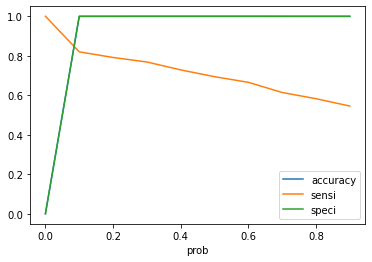

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

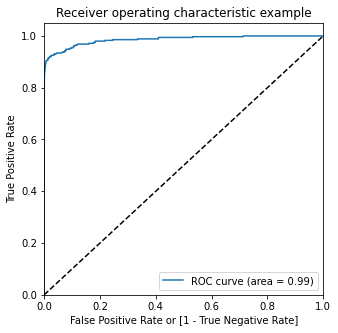

In [ ]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7610,0,0.000025,7610,0,1,0,0,0,0,0,0,0,0,0,0
190214,0,0.000051,190214,0,1,0,0,0,0,0,0,0,0,0,0
130590,0,0.000111,130590,0,1,0,0,0,0,0,0,0,0,0,0
247916,0,0.000258,247916,0,1,0,0,0,0,0,0,0,0,0,0
55518,0,0.000057,55518,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.9993429104552477

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[198946,     68],
       [    63,    287]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.82

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9996583154953923

In [ ]:
# Scaling the data
to_scale_features = X_train_lr.columns
X_test_lr[to_scale_features] = pt.transform(X_test[to_scale_features])
X_test_lr = X_test_lr[col]
X_test_lr.head()

,Time,V2,V3,V4,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V22
49089,-1.054492,-0.233276,-0.560895,0.369676,1.063597,0.711001,-0.095232,-0.828848,0.306255,-0.253320,-0.371748,-0.855520,-0.314360,-0.435584,-0.414727
154704,0.222816,-0.140817,-1.748593,-0.025081,0.730088,1.695301,-0.974184,1.097030,-2.004819,1.248858,-0.141118,-0.825584,-0.067886,2.468963,-0.143108
67247,-0.851896,-0.938971,0.531532,0.346459,0.233140,0.958128,-0.377715,1.113745,1.044915,-1.105159,-0.139909,-0.710575,-0.303358,0.345974,-0.544458
251657,1.224890,-0.158956,-1.050062,0.196123,-0.282835,0.655353,0.119447,-1.765857,-0.314866,-0.200860,0.266315,0.180992,0.109783,-0.718288,-1.237037
201903,0.830829,1.083883,-1.467842,3.067119,-0.318009,-1.929774,0.892192,-0.241852,-1.086679,0.478501,-2.535899,0.190638,0.348483,3.497318,0.359377


In [ ]:
X_test_sm = sm.add_constant(X_test_lr)
X_test_sm

,const,Time,V2,V3,V4,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V22
49089,1.0,-1.054492,-0.233276,-0.560895,0.369676,1.063597,0.711001,-0.095232,-0.828848,0.306255,-0.253320,-0.371748,-0.855520,-0.314360,-0.435584,-0.414727
154704,1.0,0.222816,-0.140817,-1.748593,-0.025081,0.730088,1.695301,-0.974184,1.097030,-2.004819,1.248858,-0.141118,-0.825584,-0.067886,2.468963,-0.143108
67247,1.0,-0.851896,-0.938971,0.531532,0.346459,0.233140,0.958128,-0.377715,1.113745,1.044915,-1.105159,-0.139909,-0.710575,-0.303358,0.345974,-0.544458
251657,1.0,1.224890,-0.158956,-1.050062,0.196123,-0.282835,0.655353,0.119447,-1.765857,-0.314866,-0.200860,0.266315,0.180992,0.109783,-0.718288,-1.237037
201903,1.0,0.830829,1.083883,-1.467842,3.067119,-0.318009,-1.929774,0.892192,-0.241852,-1.086679,0.478501,-2.535899,0.190638,0.348483,3.497318,0.359377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227071,1.0,1.032485,0.517254,0.826684,-0.319556,0.643354,-0.007988,-0.888038,0.150372,0.407236,-0.510144,0.508171,-0.084330,0.389017,-0.706203,-0.394998
161101,1.0,0.444301,-0.042174,0.316594,-1.833494,1.083463,0.081887,-1.544564,0.919783,1.244570,0.357097,0.266717,0.511509,-0.015012,-0.267693,1.495478
45955,1.0,-1.086816,-0.729912,0.303394,-1.132666,-0.538492,-0.846737,1.131384,1.856006,-0.144965,0.405838,-0.659728,-0.094028,1.688832,-0.122936,0.605738
32565,1.0,-1.229090,0.694446,0.020215,0.923765,-0.613076,-0.652317,0.531371,-0.896144,0.002184,1.378743,0.005596,1.355745,-0.997582,-0.341012,1.002833


In [ ]:
y_test_pred = res.predict(X_test_sm)
y_test_pred

49089     0.000354
154704    0.000793
67247     0.000141
251657    0.000166
201903    0.052127
            ...   
227071    0.000028
161101    0.000008
45955     0.000099
32565     0.000358
283008    0.000019
Length: 85443, dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
49089,0.000354
154704,0.000793
67247,0.000141
251657,0.000166
201903,0.052127


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

,Class,CustID
49089,0,49089
154704,0,154704
67247,0,67247
251657,0,251657
201903,0,201903
...,...,...
227071,0,227071
161101,0,161101
45955,0,45955
32565,0,32565


In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Class,CustID,0
0,0,49089,0.000354
1,0,154704,0.000793
2,0,67247,0.000141
3,0,251657,0.000166
4,0,201903,0.052127


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})
y_pred_final.head()

,Class,CustID,Fraud_Prob
0,0,49089,0.000354
1,0,154704,0.000793
2,0,67247,0.000141
3,0,251657,0.000166
4,0,201903,0.052127


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Class','Fraud_Prob'], axis=1)
y_pred_final.head()

,CustID,Class,Fraud_Prob
0,49089,0,0.000354
1,154704,0,0.000793
2,67247,0,0.000141
3,251657,0,0.000166
4,201903,0,0.052127


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9990168884519505

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )
confusion2

array([[85249,    52],
       [   32,   110]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.7746478873239436


In [ ]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
print(specificity)

0.9993903940164828


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

0.6790123456790124

In [ ]:
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

0.7746478873239436

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Class, y_pred_final.final_predicted)

0.6790123456790124

In [ ]:
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

0.7746478873239436

## Uniform Oversampling : Decision tree

In [ ]:
X_train_dc = X_train_rf.copy()
X_test_dc = X_test_rf.copy()
y_train_dc = y_train_rf.copy()
y_test_dc = X_test_rf.copy()


In [ ]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [50,60],
          "dtree__min_samples_leaf": [50,60]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)


In [ ]:
# Fit the grid search to the data
dtree_grid.fit(X_train_dc,y_train_dc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('dtree',
                                              DecisionTreeClassifier(class_weight='balanced',
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [5, 6],
                                        'dtree__min_samples_leaf': [50, 60],
                                        'dtree__min_samples_split': [50, 60]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

Pipeline(steps=[('dtree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5,
                                        min_samples_leaf=60,
                                        min_samples_split=60,
                                        random_state=42))])

In [ ]:
# print best hyperparameters
print("Best Recall: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best Recall:  0.9336186905301911
Best hyperparameters:  {'dtree__min_samples_split': 60, 'dtree__min_samples_leaf': 60, 'dtree__max_depth': 5, 'dtree__criterion': 'entropy'}


Best Threshold=0.673488


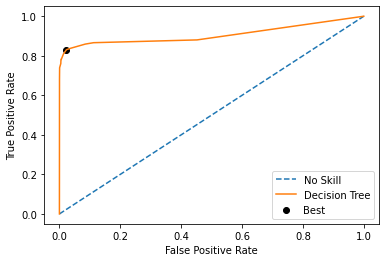

In [ ]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round(dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
model_results

[[84148  1153]
 [   27   115]]
Sensitivity: 	0.81
Specificity: 	0.99


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Tree,0.8099,0.9865,0.9336,0.8982


## Uniform Oversampling: Random Forest

In [ ]:
# Random forest
from sklearn.model_selection import RandomizedSearchCV
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('rf', RandomForestClassifier(random_state=42, class_weight = 'balanced',
                                                                          warm_start = True))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [100,110],
         "rf__min_samples_leaf": [8,10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create Randomsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42 )

In [ ]:
# Fit the grid search to the data
rf_grid.fit(X_train,y_train)

# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

# print best hyperparameters
print("Best Recall: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.5min finished


Best Recall:  0.9668739077618698
Best hyperparameters:  {'rf__n_estimators': 110, 'rf__min_samples_leaf': 10, 'rf__criterion': 'entropy'}


Best Threshold=0.108664


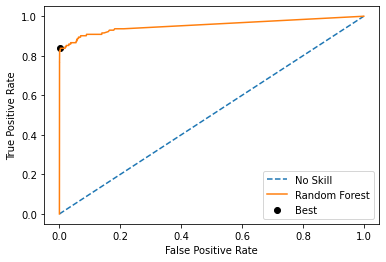

In [ ]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4), round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
model_results = model_results.append(model_results, ignore_index = True)
model_results

[[85032   269]
 [   24   118]]
Sensitivity: 	0.83
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Random Forest,0.831,0.9968,0.9669,0.9139
1,Random Forest,0.831,0.9968,0.9669,0.9139


## Uniform Oversampling: XG Boost

In [ ]:
#Pipeline Processing for powertranformation and Decision Tree classifier
import xgboost as xgb
from xgboost import XGBClassifier
pipe = Pipeline([ 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic', warm_start = True, class_weight='balanced'))])

params = {
        "xgb__gamma": [0.06,0.07],
        "xgb__max_depth": [7,8],
        "xgb__learning_rate": [0.1,0.2],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, 
                                random_state=42 )

In [ ]:
# fitting the model
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 19.0min finished


[18:26:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight, warm_start } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            class_weight='balanced',
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            l

In [ ]:
# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               class_weight='balanced', colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=1,
                               gamma=0.07, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=120,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None,
                               warm_start=True))])

In [ ]:
# print best hyperparameters
print("Best Recall: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

Best Recall:  0.9791414960942543
Best hyperparameters:  {'xgb__max_depth': 7, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.07}


Best Threshold=0.001080


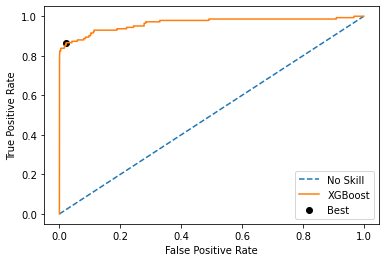

In [ ]:
# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
model_results = model_results.append(model_results, ignore_index = True)
model_results

[[83428  1873]
 [   20   122]]
Sensitivity: 	0.86
Specificity: 	0.98


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XGBoost,0.8592,0.978,0.9791,0.9186
1,XGBoost,0.8592,0.978,0.9791,0.9186


## 2. Balancing Techniue 2- Random Oversampling

In [ ]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
print('Original dataset shape: ')
print(y_train.value_counts())
print('\n')

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)


Original dataset shape: 
0    199014
1       350
Name: Class, dtype: int64




In [ ]:
print('Resampled dataset shape: ')
#Checking the class (percentage) distribution of the target after Random oversampling
pd.crosstab(y_ros, columns='count')

Resampled dataset shape: 


col_0,count
Class,
0,199014
1,199014


In [ ]:
# Logistic regression model
# Adding constant to the training model
logm1 = sm.GLM(y_ros,(sm.add_constant(X_ros)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398028
Model:                            GLM   Df Residuals:                   397997
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Nov 2020   Deviance:                          nan
Time:                        18:46:59   Pearson chi2:                 6.38e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6799      0.016   -232.042      0.000      -3.711      -3.649
Time          -0.4590      0.013    -35.340      0.000      -0.484      -0.434
V1             0.2029      0.013     15.224      0.000       0.177       0.229
V2            -0.2896      0.012    -23.984      0.000      -0.313      -0.266
V3            -0.5604      0.011    -49.329      0.000      -0.583      -0.538
V4             1.5117      0.012    125.655      0.000       1.488       1.535
V5             0.0741      0.010      7.225      0.000       0.054       0.094
V6            -0.1207      0.010    -11.682      0.000      -0.141      -0.100
V7            -0.0997      0.009    -11.132      0.000      -0.117      -0.082
V8            -0.8186      0.012    -68.137      0.000      -0.842      -0.795
V9            -0.4057      0.013    -31.713      0.000      -0.431      -0.381
V10           -0.8339      0.018    -46.495      0.000      -0.869      -0.799
V11            0.6475      0.012     52.583      0.000       0.623       0.672
V12           -1.2955      0.017    -77.275      0.000      -1.328      -1.263
V13           -0.2516      0.008    -30.852      0.000      -0.268      -0.236
V14           -1.2921      0.015    -83.644      0.000      -1.322      -1.262
V15           -0.3254      0.009    -36.165      0.000      -0.343      -0.308
V16           -0.6155      0.013    -47.429      0.000      -0.641      -0.590
V17           -0.6491      0.016    -40.466      0.000      -0.681      -0.618
V18           -0.1253      0.011    -11.491      0.000      -0.147      -0.104
V19           -0.0529      0.008     -6.293      0.000      -0.069      -0.036
V20            0.0314      0.009      3.538      0.000       0.014       0.049
V21            0.0987      0.008     12.161      0.000       0.083       0.115
V22            0.2651      0.009     28.372      0.000       0.247       0.283
V23            0.0174      0.007      2.364      0.018       0.003       0.032
V24           -0.0139      0.010     -1.450      0.147      -0.033       0.005
V25           -0.1545      0.010    -16.239      0.000      -0.173      -0.136
V26           -0.1634      0.010    -16.454      0.000      -0.183      -0.144
V27            0.2226      0.011     20.227      0.000       0.201       0.244
V28            0.1182      0.008     14.049      0.000       0.102       0.135
Amount        -0.0347      0.010     -3.370      0.001      -0.055      -0.015
==============================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 15 variables as output
rfe = rfe.fit(X_ros, y_ros)

In [ ]:
rfe.support_

array([False, False, False,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
list(zip(X_ros.columns, rfe.support_, rfe.ranking_))

[('Time', False, 2),
 ('V1', False, 10),
 ('V2', False, 6),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 16),
 ('V6', False, 8),
 ('V7', False, 13),
 ('V8', True, 1),
 ('V9', False, 5),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', False, 3),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', False, 14),
 ('V19', False, 17),
 ('V20', False, 19),
 ('V21', False, 15),
 ('V22', False, 4),
 ('V23', False, 20),
 ('V24', False, 21),
 ('V25', False, 11),
 ('V26', False, 9),
 ('V27', False, 7),
 ('V28', False, 12),
 ('Amount', False, 18)]

In [ ]:
col = X_ros.columns[rfe.support_]
X_ros.columns[~rfe.support_]

Index(['Time', 'V1', 'V2', 'V5', 'V6', 'V7', 'V9', 'V15', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_ros[col])
logm2 = sm.GLM(y_ros,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398028
Model:                            GLM   Df Residuals:                   398017
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Nov 2020   Deviance:                          nan
Time:                        18:48:25   Pearson chi2:                 1.67e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4835      0.014   -246.426      0.000      -3.511      -3.456
V3            -0.4429      0.008    -52.970      0.000      -0.459      -0.427
V4             1.5291      0.011    135.130      0.000       1.507       1.551
V8            -0.6246      0.008    -74.823      0.000      -0.641      -0.608
V10           -0.6263      0.012    -54.076      0.000      -0.649      -0.604
V11            0.5655      0.010     58.900      0.000       0.547       0.584
V12           -0.9814      0.011    -86.763      0.000      -1.004      -0.959
V13           -0.2623      0.008    -34.388      0.000      -0.277      -0.247
V14           -0.9161      0.010    -92.571      0.000      -0.936      -0.897
V16           -0.4019      0.010    -38.927      0.000      -0.422      -0.382
V17           -0.3708      0.011    -33.429      0.000      -0.393      -0.349
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,V17,9.06
9,V16,8.49
4,V10,7.12
6,V12,6.28
8,V14,5.79
5,V11,5.47
1,V3,5.11
2,V4,3.62
0,const,1.69
3,V8,1.61


In [ ]:
col = col.drop(['V17'])
col

Index(['V3', 'V4', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_ros[col])
logm3 = sm.GLM(y_ros,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398028
Model:                            GLM   Df Residuals:                   398018
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Nov 2020   Deviance:                          nan
Time:                        18:48:39   Pearson chi2:                 3.25e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3951      0.013   -256.229      0.000      -3.421      -3.369
V3            -0.4289      0.008    -52.263      0.000      -0.445      -0.413
V4             1.4033      0.010    140.510      0.000       1.384       1.423
V8            -0.4295      0.005    -92.347      0.000      -0.439      -0.420
V10           -0.4372      0.009    -46.515      0.000      -0.456      -0.419
V11            0.4394      0.008     51.783      0.000       0.423       0.456
V12           -0.8285      0.010    -86.613      0.000      -0.847      -0.810
V13           -0.2780      0.008    -36.312      0.000      -0.293      -0.263
V14           -0.7212      0.007    -97.521      0.000      -0.736      -0.707
V16           -0.2895      0.009    -32.737      0.000      -0.307      -0.272
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,V10,6.44
6,V12,6.13
8,V14,5.75
5,V11,5.47
1,V3,5.03
9,V16,4.53
2,V4,3.61
0,const,1.68
3,V8,1.49
7,V13,1.08


In [ ]:
col = col.drop(['V10'])
col

Index(['V3', 'V4', 'V8', 'V11', 'V12', 'V13', 'V14', 'V16'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_ros[col])
logm3 = sm.GLM(y_ros,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398028
Model:                            GLM   Df Residuals:                   398019
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53418.
Date:                Mon, 09 Nov 2020   Deviance:                   1.0684e+05
Time:                        18:48:43   Pearson chi2:                 4.65e+09
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3460      0.013   -262.525      0.000      -3.371      -3.321
V3            -0.5351      0.008    -66.771      0.000      -0.551      -0.519
V4             1.2880      0.009    142.718      0.000       1.270       1.306
V8            -0.3560      0.004    -85.824      0.000      -0.364      -0.348
V11            0.4469      0.008     53.619      0.000       0.431       0.463
V12           -0.8690      0.009    -92.954      0.000      -0.887      -0.851
V13           -0.2852      0.008    -37.098      0.000      -0.300      -0.270
V14           -0.8113      0.007   -117.760      0.000      -0.825      -0.798
V16           -0.3024      0.008    -36.680      0.000      -0.319      -0.286
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,V12,6.00
7,V14,5.67
4,V11,5.40
1,V3,3.78
8,V16,3.66
2,V4,3.55
0,const,1.67
3,V8,1.43
6,V13,1.08


In [ ]:
col = col.drop(['V12'])
col

Index(['V3', 'V4', 'V8', 'V11', 'V13', 'V14', 'V16'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_ros[col])
logm3 = sm.GLM(y_ros,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398028
Model:                            GLM   Df Residuals:                   398020
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58511.
Date:                Mon, 09 Nov 2020   Deviance:                   1.1702e+05
Time:                        18:48:45   Pearson chi2:                 1.05e+08
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3566      0.013   -260.171      0.000      -3.382      -3.331
V3            -0.6364      0.008    -83.026      0.000      -0.651      -0.621
V4             1.5190      0.009    164.573      0.000       1.501       1.537
V8            -0.3323      0.004    -90.900      0.000      -0.340      -0.325
V11            0.4238      0.008     54.339      0.000       0.408       0.439
V13           -0.3243      0.008    -41.697      0.000      -0.340      -0.309
V14           -0.8461      0.006   -130.818      0.000      -0.859      -0.833
V16           -0.3450      0.007    -47.888      0.000      -0.359      -0.331
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,V11,5.27
6,V14,5.04
1,V3,3.71
2,V4,3.40
7,V16,3.19
0,const,1.66
3,V8,1.42
5,V13,1.08


In [ ]:
col = col.drop(['V11'])
col

Index(['V3', 'V4', 'V8', 'V13', 'V14', 'V16'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_ros[col])
logm3 = sm.GLM(y_ros,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398028
Model:                            GLM   Df Residuals:                   398021
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60056.
Date:                Mon, 09 Nov 2020   Deviance:                   1.2011e+05
Time:                        18:48:47   Pearson chi2:                 1.41e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3738      0.013   -261.779      0.000      -3.399      -3.349
V3            -0.6572      0.007    -87.831      0.000      -0.672      -0.643
V4             1.5260      0.009    168.746      0.000       1.508       1.544
V8            -0.3070      0.004    -86.348      0.000      -0.314      -0.300
V13           -0.3353      0.008    -44.052      0.000      -0.350      -0.320
V14           -0.9481      0.006   -154.704      0.000      -0.960      -0.936
V16           -0.3617      0.007    -53.833      0.000      -0.375      -0.348
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,V14,3.66
1,V3,3.62
2,V4,3.31
6,V16,2.96
0,const,1.66
3,V8,1.42
4,V13,1.08


In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.001832
1    0.050970
2    0.002673
3    0.076061
4    0.029523
5    0.022430
6    0.004987
7    0.045690
8    0.006457
9    0.130905
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00183236, 0.05096968, 0.0026734 , 0.07606132, 0.02952268,
       0.02243045, 0.00498684, 0.04568994, 0.0064573 , 0.13090492])

In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_ros.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_ros.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.001832,0
1,0,0.050970,1
2,0,0.002673,2
3,0,0.076061,3
4,0,0.029523,4


In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_ros.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_ros.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.001832,0
1,0,0.050970,1
2,0,0.002673,2
3,0,0.076061,3
4,0,0.029523,4


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted
0,0,0.001832,0,0
1,0,0.050970,1,0
2,0,0.002673,2,0
3,0,0.076061,3,0
4,0,0.029523,4,0


In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

[[192817   6197]
 [ 16095 182919]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

0.9439938898770941


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

0.9439938898770941


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9191262926226296

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9688614871315586

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.031138512868441416


In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.031138512868441416


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.9672317519406078


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9229579918817492


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001832,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.050970,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.002673,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.076061,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.029523,4,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.872145  0.971163  0.773127
0.2   0.2  0.922825  0.959747  0.885902
0.3   0.3  0.935597  0.939205  0.931990
0.4   0.4  0.941313  0.927794  0.954832
0.5   0.5  0.943994  0.919126  0.968861
0.6   0.6  0.942049  0.904821  0.979278
0.7   0.7  0.941843  0.896329  0.987358
0.8   0.8  0.941660  0.890565  0.992754
0.9   0.9  0.925008  0.853282  0.996734


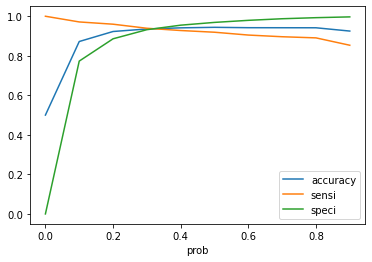

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

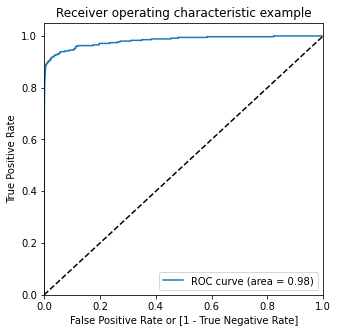

In [ ]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001832,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.050970,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.002673,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.076061,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.029523,4,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.9355974956535721

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[185479,  13535],
       [ 12099, 186915]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9392052820404595

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9319897092666848

In [ ]:
X_test_ros = X_test.copy()
y_test_ros = y_test.copy()

In [ ]:
# Scaling the data
to_scale_features = X_ros.columns
X_test_ros[to_scale_features] = pt.transform(X_test_ros[to_scale_features])
X_test_ros = X_test_ros[col]
X_test_ros.head()

,V3,V4,V8,V13,V14,V16
49089,-0.560895,0.369676,1.063597,-0.253320,-0.371748,-0.314360
154704,-1.748593,-0.025081,0.730088,1.248858,-0.141118,-0.067886
67247,0.531532,0.346459,0.233140,-1.105159,-0.139909,-0.303358
251657,-1.050062,0.196123,-0.282835,-0.200860,0.266315,0.109783
201903,-1.467842,3.067119,-0.318009,0.478501,-2.535899,0.348483


In [ ]:
X_test_sm = sm.add_constant(X_test_ros)
X_test_sm

,const,V3,V4,V8,V13,V14,V16
49089,1.0,-0.560895,0.369676,1.063597,-0.253320,-0.371748,-0.314360
154704,1.0,-1.748593,-0.025081,0.730088,1.248858,-0.141118,-0.067886
67247,1.0,0.531532,0.346459,0.233140,-1.105159,-0.139909,-0.303358
251657,1.0,-1.050062,0.196123,-0.282835,-0.200860,0.266315,0.109783
201903,1.0,-1.467842,3.067119,-0.318009,0.478501,-2.535899,0.348483
...,...,...,...,...,...,...,...
227071,1.0,0.826684,-0.319556,0.643354,-0.510144,0.508171,0.389017
161101,1.0,0.316594,-1.833494,1.083463,0.357097,0.266717,-0.015012
45955,1.0,0.303394,-1.132666,-0.538492,0.405838,-0.659728,1.688832
32565,1.0,0.020215,0.923765,-0.613076,1.378743,0.005596,-0.997582


In [ ]:
y_test_pred = res.predict(X_test_sm)
y_test_pred

49089     0.098276
154704    0.060226
67247     0.065803
251657    0.074302
201903    0.988868
            ...   
227071    0.006345
161101    0.000841
45955     0.005180
32565     0.130559
283008    0.006550
Length: 85443, dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
49089,0.098276
154704,0.060226
67247,0.065803
251657,0.074302
201903,0.988868


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test_ros)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

,Class,CustID
49089,0,49089
154704,0,154704
67247,0,67247
251657,0,251657
201903,0,201903
...,...,...
227071,0,227071
161101,0,161101
45955,0,45955
32565,0,32565


In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Class,CustID,0
0,0,49089,0.098276
1,0,154704,0.060226
2,0,67247,0.065803
3,0,251657,0.074302
4,0,201903,0.988868


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})
y_pred_final.head()

,Class,CustID,Fraud_Prob
0,0,49089,0.098276
1,0,154704,0.060226
2,0,67247,0.065803
3,0,251657,0.074302
4,0,201903,0.988868


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9292393759582411

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )
confusion2

array([[79267,  6034],
       [   12,   130]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9154929577464789

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9292622595280243

In [ ]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9154929577464789

In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)
print("AUC: \t",AUC)

## Random Oversampling: Decision Tree

In [ ]:
#Pipeline Processing Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": range(1, 40),"dtree__min_samples_split": range(5, 200, 20),
          "dtree__min_samples_leaf": range(5, 200, 20)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_clf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
# Fit the grid search to the data
model_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': range(1, 40),
                                        'dtree__min_samples_leaf': range(5, 200, 20),
                                        'dtree__min_samples_split': range(5, 200, 20)},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# We automatically get the decision tree with the best parameters.
model_clf.best_estimator_

Pipeline(steps=[('dtree',
                 DecisionTreeClassifier(max_depth=31, min_samples_leaf=185,
                                        min_samples_split=45,
                                        random_state=42))])

In [ ]:
# print best hyperparameters
print("Best ROC_AUC: ", model_clf.best_score_)
print("Best hyperparameters: ", model_clf.best_params_)

Best ROC_AUC:  0.9538896477269109
Best hyperparameters:  {'dtree__min_samples_split': 45, 'dtree__min_samples_leaf': 185, 'dtree__max_depth': 31, 'dtree__criterion': 'gini'}


Best Threshold=0.016216


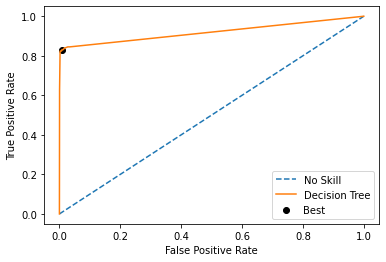

In [ ]:
# predict probabilities
y_pred_prob = model_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

print("AUC: \t",AUC)


[[84724   577]
 [   25   117]]
Sensitivity: 	0.82
Specificity: 	0.99


## Random Oversampling: Random Forest

In [ ]:
#Pipeline Processing Random forest classifier
pipe = Pipeline([('randomforest', RandomForestClassifier(warm_start = True,random_state = 42))])

# hyperparameter space
params = [
{'randomforest__n_estimators': range(200, 250), 'randomforest__min_samples_leaf': [2,4], 
 'randomforest__criterion': ["gini", "entropy"]}
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_rf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
# fit model
model_rf.fit(X_ros, y_ros)


# We automatically get the logistic regression with the best parameters.
model_rf.best_estimator_

# print best hyperparameters
print("Best ROC_AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 49.9min finished


Best ROC_AUC:  0.9999974698897838
Best hyperparameters:  {'randomforest__n_estimators': 208, 'randomforest__min_samples_leaf': 4, 'randomforest__criterion': 'entropy'}


Best Threshold=0.038437


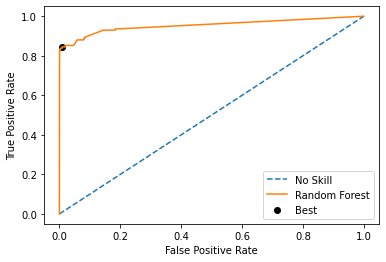

In [ ]:
# predict probabilities
y_pred_prob = model_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)
print("AUC: \t",AUC)

[[84541   760]
 [   23   119]]
Sensitivity: 	0.84
Specificity: 	0.99
AUC: 	 0.9146


## Random Oversampling: XG Boost

In [ ]:
from xgboost import XGBClassifier

#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('Xgb', XGBClassifier(objective = 'binary:logistic',n_estimators=120,random_state = 42))])

# hyperparameter space
params = [
{"Xgb__learning_rate"    : [0.10, 0.15] ,
 "Xgb__max_depth"        : [12, 15],
 "Xgb__min_child_weight" : [ 1, 3],
 "Xgb__gamma"            : [0.3, 0.4 ],
 "Xgb__colsample_bytree" : [ 0.3, 0.4] }
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_xgb = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)


In [ ]:
# fit model
model_xgb.fit(X_ros, y_ros)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('Xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                                            max_de

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best AUC:  0.9999926206438421
Best hyperparameters:  {'Xgb__min_child_weight': 1, 'Xgb__max_depth': 12, 'Xgb__learning_rate': 0.15, 'Xgb__gamma': 0.4, 'Xgb__colsample_bytree': 0.3}


Best Threshold=0.038437


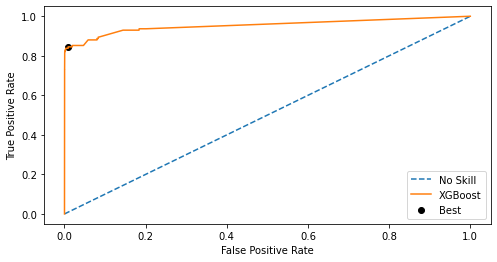

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)
print("AUC: \t",AUC)


[[84541   760]
 [   23   119]]
Sensitivity: 	0.84
Specificity: 	0.99
AUC: 	 0.9146


## BALANCING TECHINQUE 3: SMOTE

In [ ]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

sm = over_sampling.SMOTE(random_state=0)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [ ]:
print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

Imbalance in Original y_train : 


col_0,count
Class,
0,199014
1,350


In [ ]:
print("After SMOTE: ")
pd.crosstab(y_smote, columns='count')

After SMOTE: 


col_0,count
Class,
0,199014
1,199014


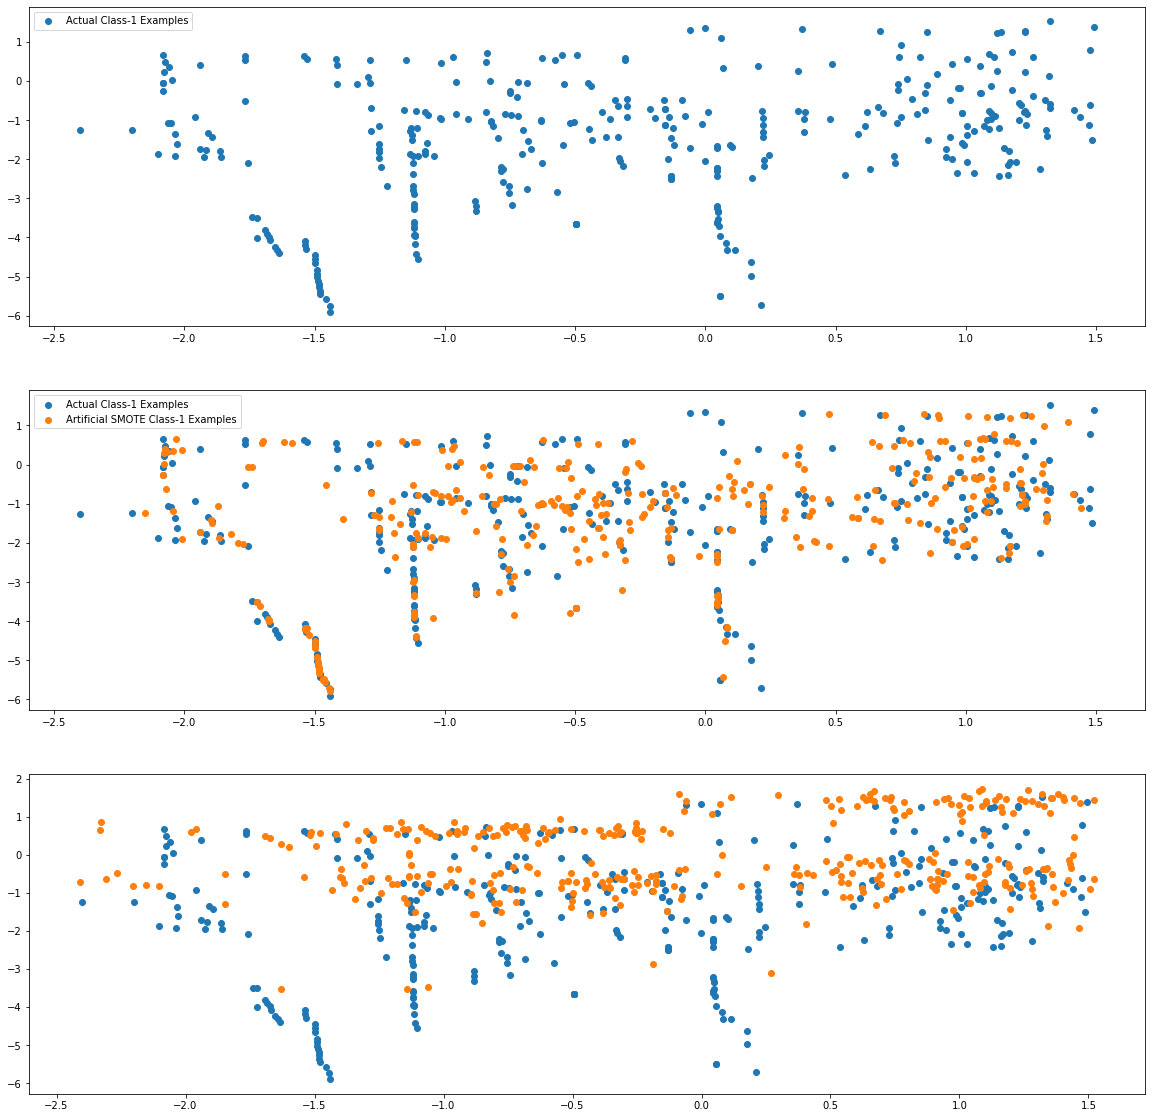

In [ ]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')

### SMOTE: LOGISTIC REGRESSION

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
import statsmodels.api as sm

In [ ]:
X_train_smote_lr = X_smote.copy()
y_train_smote_lr = y_smote.copy()

In [ ]:
# Logistic regression model
# Adding constant to the training model
logm1 = sm.GLM(y_smote,(sm.add_constant(X_smote)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398009
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Nov 2020   Deviance:                          nan
Time:                        13:26:20   Pearson chi2:                 9.46e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9861      0.019   -208.755      0.000      -4.024      -3.949
Time          -0.3333      0.013    -25.536      0.000      -0.359      -0.308
V1             0.4476      0.016     28.284      0.000       0.417       0.479
V2            -0.2516      0.015    -16.955      0.000      -0.281      -0.223
V3            -0.2822      0.012    -24.166      0.000      -0.305      -0.259
V4             1.8770      0.016    120.179      0.000       1.846       1.908
V5             0.2898      0.011     26.497      0.000       0.268       0.311
V6            -0.0115      0.010     -1.113      0.266      -0.032       0.009
V7            -0.0283      0.010     -2.771      0.006      -0.048      -0.008
V8            -0.9008      0.013    -69.781      0.000      -0.926      -0.875
V9            -0.4312      0.017    -25.037      0.000      -0.465      -0.397
V10           -1.4802      0.024    -62.654      0.000      -1.527      -1.434
V11            0.8937      0.014     65.710      0.000       0.867       0.920
V12           -1.2682      0.019    -68.408      0.000      -1.305      -1.232
V13           -0.1414      0.009    -15.543      0.000      -0.159      -0.124
V14           -1.6166      0.018    -92.265      0.000      -1.651      -1.582
V15           -0.1178      0.009    -12.983      0.000      -0.136      -0.100
V16           -0.7730      0.016    -46.962      0.000      -0.805      -0.741
V17           -0.9211      0.018    -50.340      0.000      -0.957      -0.885
V18           -0.2800      0.014    -20.669      0.000      -0.307      -0.253
V19            0.1063      0.010     10.842      0.000       0.087       0.125
V20            0.0273      0.010      2.658      0.008       0.007       0.048
V21            0.1507      0.009     16.706      0.000       0.133       0.168
V22            0.3238      0.011     29.829      0.000       0.302       0.345
V23           -0.1694      0.006    -26.152      0.000      -0.182      -0.157
V24            0.1817      0.010     18.166      0.000       0.162       0.201
V25           -0.2798      0.010    -27.351      0.000      -0.300      -0.260
V26           -0.0832      0.011     -7.722      0.000      -0.104      -0.062
V27            0.1282      0.011     11.473      0.000       0.106       0.150
V28            0.1432      0.010     14.917      0.000       0.124       0.162
Amount        -0.0204      0.011     -1.867      0.062      -0.042       0.001
==============================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_smote, y_smote)

In [ ]:
rfe.support_

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False])

In [ ]:
list(zip(X_smote.columns, rfe.support_, rfe.ranking_))

[('Time', True, 1),
 ('V1', True, 1),
 ('V2', False, 3),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', True, 1),
 ('V6', False, 16),
 ('V7', False, 13),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', False, 6),
 ('V14', True, 1),
 ('V15', False, 10),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', False, 5),
 ('V19', False, 11),
 ('V20', False, 14),
 ('V21', False, 7),
 ('V22', True, 1),
 ('V23', False, 4),
 ('V24', False, 2),
 ('V25', True, 1),
 ('V26', False, 12),
 ('V27', False, 9),
 ('V28', False, 8),
 ('Amount', False, 15)]

In [ ]:
col = X_smote.columns[rfe.support_]
X_smote.columns[~rfe.support_]

Index(['V2', 'V6', 'V7', 'V13', 'V15', 'V18', 'V19', 'V20', 'V21', 'V23',
       'V24', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm2 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398024
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Nov 2020   Deviance:                          nan
Time:                        13:27:27   Pearson chi2:                 6.60e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8179      0.018   -212.153      0.000      -3.853      -3.783
Time          -0.2840      0.012    -23.866      0.000      -0.307      -0.261
V1             0.2432      0.012     19.914      0.000       0.219       0.267
V3            -0.3314      0.011    -30.621      0.000      -0.353      -0.310
V4             1.8156      0.015    119.921      0.000       1.786       1.845
V5             0.3032      0.009     34.115      0.000       0.286       0.321
V8            -0.7521      0.010    -76.674      0.000      -0.771      -0.733
V9            -0.2289      0.011    -19.935      0.000      -0.251      -0.206
V10           -1.2677      0.018    -70.521      0.000      -1.303      -1.232
V11            0.7357      0.011     65.805      0.000       0.714       0.758
V12           -0.9577      0.012    -76.645      0.000      -0.982      -0.933
V14           -1.3290      0.012   -108.458      0.000      -1.353      -1.305
V16           -0.7140      0.014    -52.070      0.000      -0.741      -0.687
V17           -0.7237      0.015    -47.720      0.000      -0.753      -0.694
V22            0.1900      0.010     19.190      0.000       0.171       0.209
V25           -0.3137      0.010    -32.928      0.000      -0.332      -0.295
==============================================================================
"""

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,V10,13.85
13,V17,11.22
12,V16,9.15
3,V3,8.43
11,V14,7.90
5,V5,7.35
10,V12,6.91
9,V11,6.68
7,V9,5.94
4,V4,4.32


In [ ]:
col = col.drop(['V10'])
col

Index(['Time', 'V1', 'V3', 'V4', 'V8', 'V9', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V26'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm3 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398025
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53481.
Date:                Mon, 09 Nov 2020   Deviance:                   1.0696e+05
Time:                        13:28:21   Pearson chi2:                 4.86e+10
No. Iterations:                    12   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3112      0.013   -260.730      0.000      -3.336      -3.286
Time          -0.3183      0.011    -27.760      0.000      -0.341      -0.296
V1            -0.0615      0.009     -6.506      0.000      -0.080      -0.043
V3            -0.5200      0.010    -51.350      0.000      -0.540      -0.500
V4             1.2653      0.009    135.354      0.000       1.247       1.284
V5             0.0636      0.008      8.445      0.000       0.049       0.078
V8            -0.3380      0.006    -56.686      0.000      -0.350      -0.326
V9            -0.1482      0.009    -15.631      0.000      -0.167      -0.130
V11            0.4529      0.009     49.144      0.000       0.435       0.471
V12           -0.6386      0.010    -64.092      0.000      -0.658      -0.619
V14           -1.0675      0.009   -115.630      0.000      -1.086      -1.049
V16           -0.3121      0.009    -33.087      0.000      -0.331      -0.294
V17           -0.0503      0.008     -6.337      0.000      -0.066      -0.035
V22            0.1669      0.009     17.779      0.000       0.148       0.185
V25           -0.1364      0.009    -15.291      0.000      -0.154      -0.119
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,V17,14.44
9,V14,12.34
10,V16,12.27
2,V3,10.86
8,V12,10.69
7,V11,9.97
4,V5,7.41
3,V4,6.57
6,V9,6.44
1,V1,3.48


In [ ]:
col = col.drop(['V17'])
col

Index(['Time', 'V1', 'V3', 'V4', 'V8', 'V9', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V26'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm5 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398026
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53501.
Date:                Mon, 09 Nov 2020   Deviance:                   1.0700e+05
Time:                        13:28:38   Pearson chi2:                 1.50e+10
No. Iterations:                    11   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3077      0.013   -261.755      0.000      -3.332      -3.283
Time          -0.3043      0.011    -27.053      0.000      -0.326      -0.282
V1            -0.0738      0.009     -8.005      0.000      -0.092      -0.056
V3            -0.5112      0.010    -51.190      0.000      -0.531      -0.492
V4             1.2581      0.009    135.965      0.000       1.240       1.276
V5             0.0546      0.007      7.394      0.000       0.040       0.069
V8            -0.3216      0.005    -61.212      0.000      -0.332      -0.311
V9            -0.1494      0.009    -15.842      0.000      -0.168      -0.131
V11            0.4432      0.009     49.086      0.000       0.426       0.461
V12           -0.6264      0.010    -65.048      0.000      -0.645      -0.608
V14           -1.0418      0.008   -128.608      0.000      -1.058      -1.026
V16           -0.3054      0.009    -33.193      0.000      -0.323      -0.287
V22            0.1695      0.009     18.089      0.000       0.151       0.188
V25           -0.1319      0.009    -14.853      0.000      -0.149      -0.114
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,V14,12.33
8,V12,10.33
2,V3,10.32
7,V11,9.81
4,V5,6.78
3,V4,6.52
10,V16,6.27
6,V9,6.07
1,V1,3.48
5,V8,2.01


In [ ]:
col = col.drop(['V14'])
col

Index(['Time', 'V1', 'V3', 'V4', 'V8', 'V9', 'V11', 'V12', 'V13', 'V15', 'V16',
       'V26'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm5 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398027
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66410.
Date:                Mon, 09 Nov 2020   Deviance:                   1.3282e+05
Time:                        13:28:50   Pearson chi2:                 2.33e+07
No. Iterations:                     9   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0996      0.012   -268.362      0.000      -3.122      -3.077
Time          -0.0535      0.010     -5.406      0.000      -0.073      -0.034
V1            -0.2633      0.008    -32.580      0.000      -0.279      -0.247
V3            -0.7521      0.009    -84.007      0.000      -0.770      -0.735
V4             1.3626      0.009    156.329      0.000       1.345       1.380
V5             0.0499      0.007      7.514      0.000       0.037       0.063
V8            -0.3426      0.005    -73.820      0.000      -0.352      -0.333
V9            -0.1841      0.008    -21.958      0.000      -0.201      -0.168
V11            0.7228      0.008     94.736      0.000       0.708       0.738
V12           -0.6511      0.007    -88.976      0.000      -0.665      -0.637
V16           -0.1051      0.007    -15.356      0.000      -0.118      -0.092
V22           -0.0186      0.008     -2.339      0.019      -0.034      -0.003
V25            0.1224      0.008     16.107      0.000       0.107       0.137
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,V3,10.31
8,V12,8.71
7,V11,7.96
4,V5,6.33
9,V16,6.09
3,V4,6.03
6,V9,6.03
1,V1,3.48
5,V8,2.00
0,Time,1.70


In [ ]:
col = col.drop(['V3'])
col

Index(['Time', 'V1', 'V4', 'V8', 'V9', 'V11', 'V12', 'V13', 'V15', 'V16',
       'V26'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm5 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398028
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70264.
Date:                Mon, 09 Nov 2020   Deviance:                   1.4053e+05
Time:                        13:29:03   Pearson chi2:                 9.11e+06
No. Iterations:                     9   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0108      0.011   -271.636      0.000      -3.032      -2.989
Time           0.4073      0.008     50.276      0.000       0.391       0.423
V1            -0.1979      0.008    -25.011      0.000      -0.213      -0.182
V4             1.3972      0.008    167.404      0.000       1.381       1.414
V5            -0.0351      0.006     -5.475      0.000      -0.048      -0.023
V8            -0.2479      0.004    -64.465      0.000      -0.255      -0.240
V9            -0.2004      0.008    -25.000      0.000      -0.216      -0.185
V11            0.9137      0.007    126.048      0.000       0.900       0.928
V12           -0.7795      0.007   -111.954      0.000      -0.793      -0.766
V16           -0.1292      0.006    -19.897      0.000      -0.142      -0.116
V22           -0.1435      0.008    -18.700      0.000      -0.159      -0.128
V25            0.2126      0.007     29.848      0.000       0.199       0.227
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,V12,8.34
6,V11,7.04
5,V9,5.96
8,V16,5.96
2,V4,5.65
3,V5,4.54
1,V1,3.46
4,V8,1.99
9,V22,1.38
10,V25,1.32


In [ ]:
col = col.drop(['V12'])
col

Index(['Time', 'V1', 'V4', 'V8', 'V9', 'V11', 'V13', 'V15', 'V16', 'V26'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm5 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398029
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77548.
Date:                Mon, 09 Nov 2020   Deviance:                   1.5510e+05
Time:                        13:29:15   Pearson chi2:                 3.37e+07
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0721      0.012   -266.247      0.000      -3.095      -3.049
Time           0.3709      0.008     48.207      0.000       0.356       0.386
V1            -0.3494      0.008    -45.596      0.000      -0.364      -0.334
V4             1.6993      0.009    197.940      0.000       1.682       1.716
V5            -0.0579      0.006     -8.983      0.000      -0.071      -0.045
V8            -0.2601      0.004    -68.169      0.000      -0.268      -0.253
V9            -0.1215      0.008    -15.228      0.000      -0.137      -0.106
V11            1.0711      0.007    154.749      0.000       1.058       1.085
V16           -0.3003      0.006    -52.009      0.000      -0.312      -0.289
V22           -0.1894      0.007    -25.859      0.000      -0.204      -0.175
V25            0.1884      0.007     27.240      0.000       0.175       0.202
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,V11,6.13
5,V9,5.84
2,V4,5.11
7,V16,5.09
3,V5,4.49
1,V1,3.43
4,V8,1.99
8,V22,1.37
9,V25,1.32
0,Time,1.25


In [ ]:
col = col.drop(['V11'])
col

Index(['Time', 'V1', 'V4', 'V8', 'V9', 'V13', 'V15', 'V16', 'V26'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm5 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398030
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93226.
Date:                Mon, 09 Nov 2020   Deviance:                   1.8645e+05
Time:                        13:29:25   Pearson chi2:                 1.06e+08
No. Iterations:                     9   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7335      0.010   -266.333      0.000      -2.754      -2.713
Time           0.0989      0.007     14.921      0.000       0.086       0.112
V1            -0.3021      0.007    -43.383      0.000      -0.316      -0.288
V4             1.8324      0.008    232.113      0.000       1.817       1.848
V5            -0.0258      0.006     -4.165      0.000      -0.038      -0.014
V8            -0.2321      0.004    -64.822      0.000      -0.239      -0.225
V9            -0.4092      0.007    -57.886      0.000      -0.423      -0.395
V16           -0.5526      0.005   -117.216      0.000      -0.562      -0.543
V22           -0.2823      0.007    -42.932      0.000      -0.295      -0.269
V25            0.1689      0.006     27.520      0.000       0.157       0.181
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,V9,5.58
3,V5,4.24
2,V4,3.93
6,V16,3.88
1,V1,3.43
4,V8,1.98
7,V22,1.34
8,V25,1.31
0,Time,1.20


In [ ]:
col = col.drop(['V9'])
col

Index(['Time', 'V1', 'V4', 'V8', 'V13', 'V15', 'V16', 'V26'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_smote[col])
logm5 = sm.GLM(y_smote,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398040
Model:                            GLM   Df Residuals:                   398031
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94924.
Date:                Mon, 09 Nov 2020   Deviance:                   1.8985e+05
Time:                        13:29:33   Pearson chi2:                 1.09e+08
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8130      0.010   -269.054      0.000      -2.834      -2.793
Time           0.1700      0.006     26.374      0.000       0.157       0.183
V1            -0.3911      0.007    -57.287      0.000      -0.405      -0.378
V4             2.0195      0.008    266.309      0.000       2.005       2.034
V5             0.0013      0.006      0.201      0.840      -0.011       0.014
V8            -0.2049      0.004    -53.524      0.000      -0.212      -0.197
V16           -0.5892      0.005   -126.457      0.000      -0.598      -0.580
V22           -0.2657      0.007    -39.811      0.000      -0.279      -0.253
V25            0.2185      0.006     36.276      0.000       0.207       0.230
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,V5,3.82
5,V16,3.69
1,V1,3.36
2,V4,2.69
4,V8,1.90
7,V25,1.29
6,V22,1.23
0,Time,1.19


In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.103916
1    0.033840
2    0.066840
3    0.009091
4    0.368767
5    0.027806
6    0.151390
7    0.016650
8    0.468983
9    0.043968
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10391595, 0.03383967, 0.0668402 , 0.00909098, 0.36876734,
       0.02780564, 0.15139028, 0.01664977, 0.46898346, 0.04396813])

In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_smote.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_smote.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.103916,0
1,0,0.033840,1
2,0,0.066840,2
3,0,0.009091,3
4,0,0.368767,4


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted
0,0,0.103916,0,0
1,0,0.033840,1,0
2,0,0.066840,2,0
3,0,0.009091,3,0
4,0,0.368767,4,0


In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

[[184003  15017]
 [ 23007 176013]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8843985529092554

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9245452718319767

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07545472816802332


In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07545472816802332


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.9213893105794901


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.888860441524564


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.103916,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0.033840,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.066840,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.009091,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.368767,4,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.800580  0.973907  0.627254
0.2   0.2  0.864217  0.955542  0.772892
0.3   0.3  0.891302  0.935474  0.847131
0.4   0.4  0.901706  0.909738  0.893674
0.5   0.5  0.904472  0.884399  0.924545
0.6   0.6  0.902517  0.858582  0.946453
0.7   0.7  0.895357  0.826520  0.964195
0.8   0.8  0.875771  0.773842  0.977701
0.9   0.9  0.841232  0.694322  0.988142


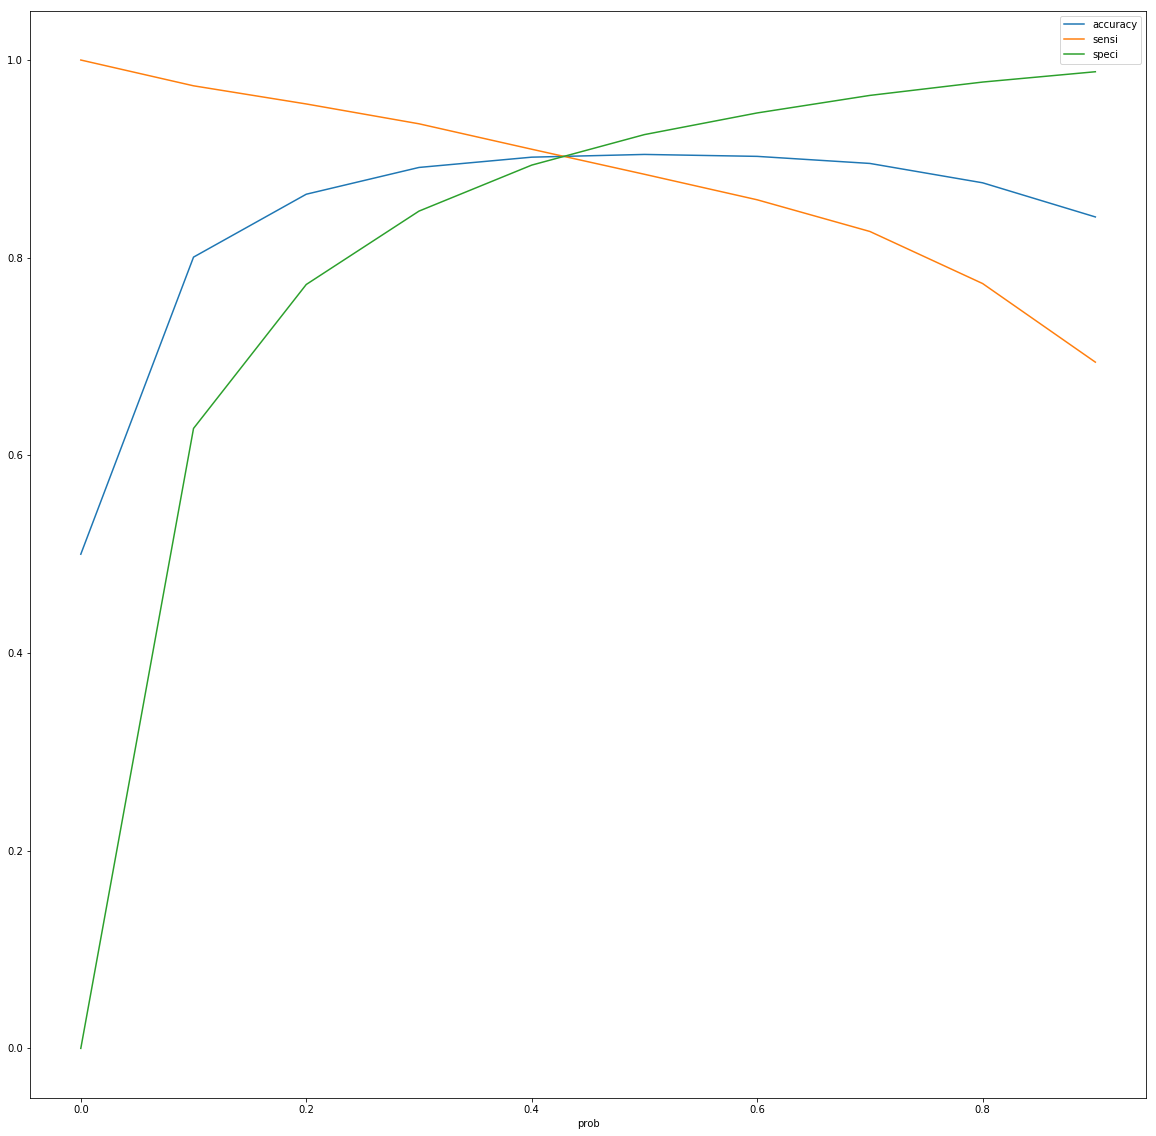

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

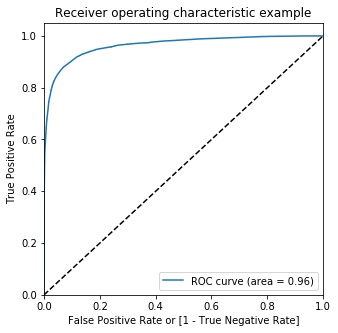

In [ ]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.103916,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.033840,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.066840,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.009091,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.368767,4,0,1,1,1,1,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.904471912370616

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[184003,  15017],
       [ 23007, 176013]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8843985529092554

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9245452718319767

In [ ]:
X_test_smote_lr = X_test.copy()
y_test_smote_lr = y_test.copy()

In [ ]:
# Scaling the data
to_scale_features = X_test_smote_lr.columns
X_test_smote_lr[to_scale_features] = pt.transform(X_test_smote_lr[to_scale_features])
X_test_smote_lr = X_test_smote_lr[col]
X_test_smote_lr.head()

,Time,V1,V4,V5,V8,V16,V22,V25
262922,1.319990,-0.553951,2.639696,1.288459,-0.361266,-0.927355,0.966621,2.556340
123418,-0.306337,0.026091,1.079574,0.578359,0.268395,1.624976,-0.253061,-0.853108
206135,0.868496,1.449148,0.332960,0.022460,-0.503796,-0.380451,1.325718,0.544512
273483,1.407567,-0.529268,-0.408856,0.358472,-0.025864,-0.030942,-0.762667,0.821290
245758,1.178519,1.009469,0.522445,-0.284544,-0.219652,0.138021,-0.271766,-0.573686


In [ ]:
X_test_sm = sm.add_constant(X_test_smote_lr)
X_test_sm

,const,Time,V1,V4,V5,V8,V16,V22,V25
262922,1.0,1.319990,-0.553951,2.639696,1.288459,-0.361266,-0.927355,0.966621,2.556340
123418,1.0,-0.306337,0.026091,1.079574,0.578359,0.268395,1.624976,-0.253061,-0.853108
206135,1.0,0.868496,1.449148,0.332960,0.022460,-0.503796,-0.380451,1.325718,0.544512
273483,1.0,1.407567,-0.529268,-0.408856,0.358472,-0.025864,-0.030942,-0.762667,0.821290
245758,1.0,1.178519,1.009469,0.522445,-0.284544,-0.219652,0.138021,-0.271766,-0.573686
...,...,...,...,...,...,...,...,...,...
109541,1.0,-0.424459,0.698317,0.494049,-0.132959,-0.263753,0.635877,-1.199251,0.493801
41813,1.0,-1.128561,-0.501780,-1.044732,0.691107,1.165572,0.391306,1.833992,-0.541473
16722,1.0,-1.456370,0.407307,0.446680,0.204097,0.549628,-1.475260,0.131177,0.149969
36147,1.0,-1.188865,-1.787943,1.233286,1.242284,0.196688,0.580977,1.703991,0.733145


In [ ]:
y_test_pred = res.predict(X_test_sm)
y_test_pred

262922    0.979821
123418    0.138722
206135    0.078298
273483    0.058067
245758    0.114840
            ...   
109541    0.113564
41813     0.002491
16722     0.173211
36147     0.377817
198375    0.057330
Length: 85443, dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
262922,0.979821
123418,0.138722
206135,0.078298
273483,0.058067
245758,0.114840


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test_smote)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

,Class,CustID
262922,0,262922
123418,0,123418
206135,0,206135
273483,0,273483
245758,0,245758
...,...,...
109541,0,109541
41813,0,41813
16722,0,16722
36147,0,36147


In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Class,CustID,0
0,0,262922,0.979821
1,0,123418,0.138722
2,0,206135,0.078298
3,0,273483,0.058067
4,0,245758,0.114840


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})
y_pred_final.head()

,Class,CustID,Fraud_Prob
0,0,262922,0.979821
1,0,123418,0.138722
2,0,206135,0.078298
3,0,273483,0.058067
4,0,245758,0.114840


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Class','Fraud_Prob'], axis=1)
y_pred_final.head()

,CustID,Class,Fraud_Prob
0,262922,0,0.979821
1,123418,0,0.138722
2,206135,0,0.078298
3,273483,0,0.058067
4,245758,0,0.114840


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9257867818311623

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted )
confusion2

array([[78982,  6313],
       [   28,   120]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8108108108108109

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9259862829005218

In [ ]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_pred_final.Class, y_pred_final.final_predicted)

0.8108108108108109

In [ ]:
@@@@@@@@@@@@@@@

0    0.018273
1    0.056790
2    0.000652
3    0.040996
4    0.093806
5    0.024359
6    0.182398
7    0.041070
8    0.039765
9    0.460929
dtype: float64

## SMOTE- Decision Tree 

In [ ]:
X_train_smote = X_smote.copy()
y_train_smote = y_smote.copy()

In [ ]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [14, 15],"dtree__min_samples_split": [100,125],
          "dtree__min_samples_leaf": [45, 50]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_clf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
model_clf.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [14, 15],
                                        'dtree__min_samples_leaf': [45, 50],
                                        'dtree__min_samples_split': [100, 125]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_clf.best_score_)
print("Best hyperparameters: ", model_clf.best_params_)

Best AUC:  0.9993464926309958
Best hyperparameters:  {'dtree__min_samples_split': 125, 'dtree__min_samples_leaf': 45, 'dtree__max_depth': 14, 'dtree__criterion': 'entropy'}


In [ ]:
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]

Best Threshold=0.155556


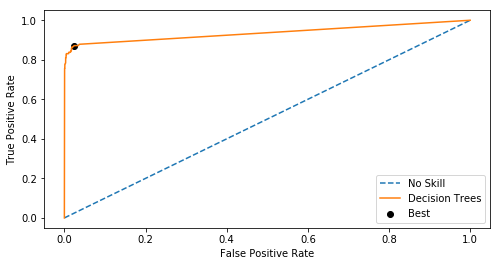

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Trees')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[83506  1789]
 [   20   128]]
Sensitivity: 	0.86
Specificity: 	0.98
AUC:    	 0.92


In [ ]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','Sensitivity','Specificity',' Train AUC Score','Test AUC Score']
models_smote = pd.DataFrame(columns = cols)

In [ ]:
models_smote.loc[-1] = ["Decision Trees",round(sensitivity,4),round(specificity,4),round(model_clf.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Trees,0.8649,0.979,0.9993,0.9219


## SMOTE: XG BOOST

In [ ]:
from xgboost import XGBClassifier

#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('Xgb', XGBClassifier(objective = 'binary:logistic',n_estimators=120,random_state = 42))])

# hyperparameter space
params = [
{"Xgb__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "Xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "Xgb__min_child_weight" : [ 1, 3, 5, 7 ],
 "Xgb__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "Xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_xgb = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
# fit model
model_xgb.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 40.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('Xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                                            max_de

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best AUC:  0.9999878689572423
Best hyperparameters:  {'Xgb__min_child_weight': 1, 'Xgb__max_depth': 15, 'Xgb__learning_rate': 0.15, 'Xgb__gamma': 0.4, 'Xgb__colsample_bytree': 0.3}


In [ ]:
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

Best Threshold=0.000322


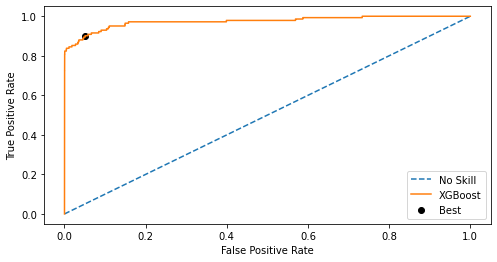

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[80980  4321]
 [   15   127]]
Sensitivity: 	0.89
Specificity: 	0.95
AUC:    	 0.92


In [ ]:
models_smote.loc[-1] = ["XgBoost",round(sensitivity,4),round(specificity,4),round(model_xgb.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

## SMOTE: Random Forest

In [ ]:
#Pipeline Processing Random forest classifier
pipe = Pipeline([('randomforest', RandomForestClassifier(warm_start = True,random_state = 42))])

# hyperparameter space
params = [
{'randomforest__n_estimators': [100, 110], 'randomforest__min_samples_leaf': [8, 10], 
 'randomforest__criterion': ["gini", "entropy"]}
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_rf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
# fit model
model_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 31.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('randomforest',
                                              RandomForestClassifier(random_state=42,
                                                                     warm_start=True))]),
                   n_jobs=-1,
                   param_distributions=[{'randomforest__criterion': ['gini',
                                                                     'entropy'],
                                         'randomforest__min_samples_leaf': [8,
                                                                            10],
                                         'randomforest__n_estimators': [100,
                                                                        110]}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9999927179622038
Best hyperparameters:  {'randomforest__n_estimators': 100, 'randomforest__min_samples_leaf': 8, 'randomforest__criterion': 'entropy'}


In [ ]:
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]

Best Threshold=0.074873


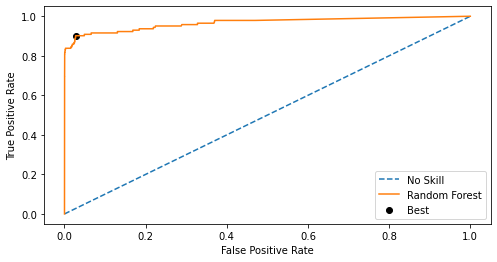

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[82962  2339]
 [   15   127]]
Sensitivity: 	0.89
Specificity: 	0.97
AUC:    	 0.93


## BALANCING TECHNIQUE 4: ADASYN

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import over_sampling

In [ ]:
#Applying Adasyn
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [ ]:
print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

Imbalance in Original y_train : 


col_0,count
Class,
0,199014
1,350


In [ ]:
print("y_train after ADASYN : ")
#Checking the class (percentage) distribution of the target after ADASYN
pd.crosstab( y_train_adasyn, columns='count')


y_train after ADASYN : 


col_0,count
Class,
0,199014
1,199048


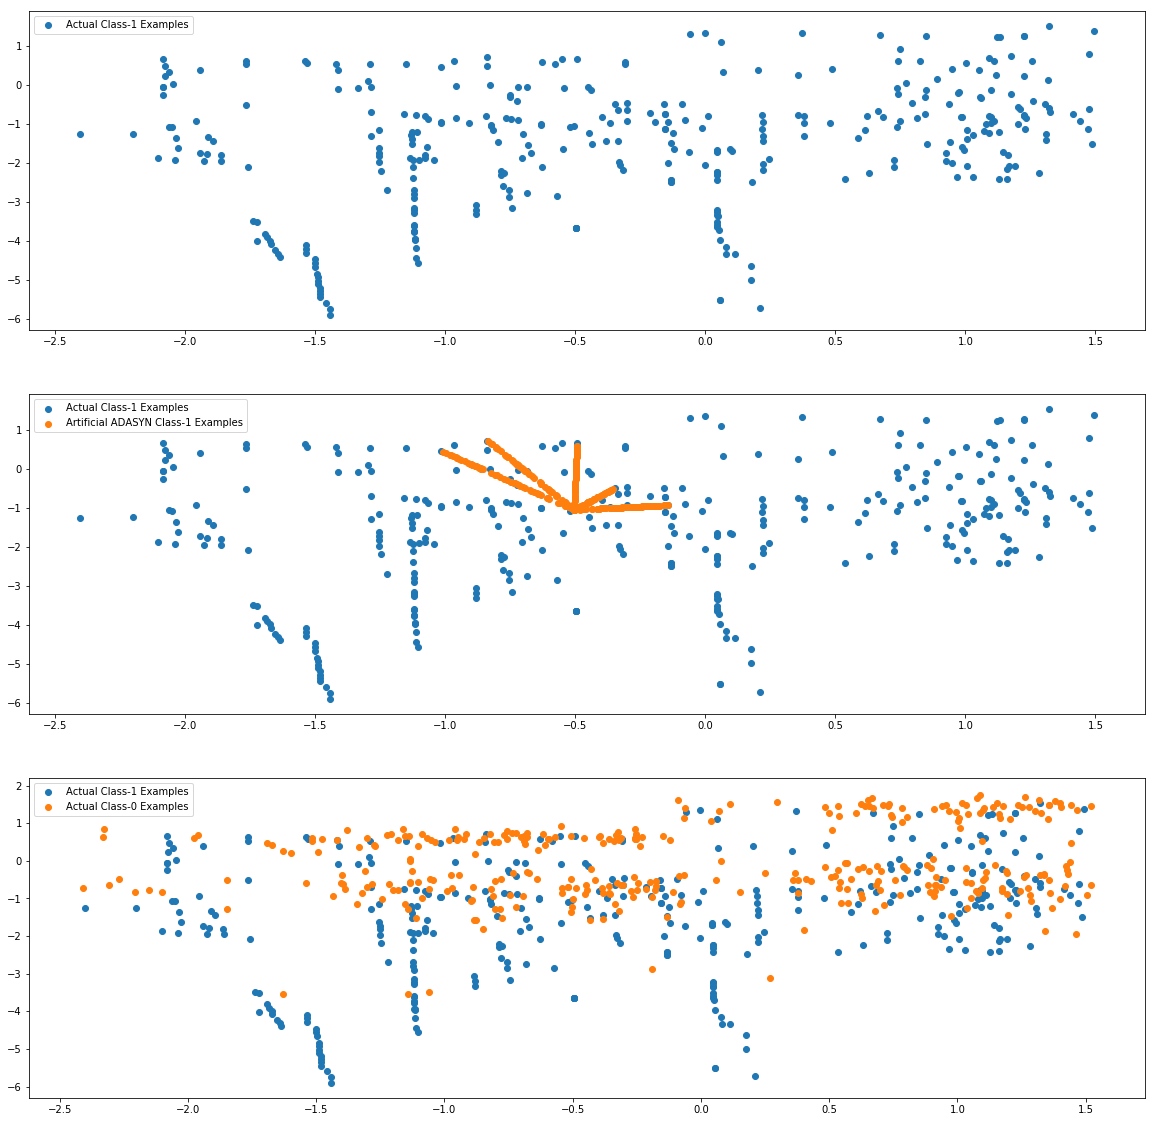

In [ ]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## ADASYN Model 1:  Logistic Regression

In [ ]:
X_adaysn = X_train_adasyn.copy()
y_adaysn = y_train_adasyn.copy()

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
import statsmodels.api as sm

In [ ]:
# Logistic regression model
# Adding constant to the training model
logm1 = sm.GLM(y_train_adasyn,(sm.add_constant(X_train_adasyn)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398062
Model:                            GLM   Df Residuals:                   398031
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Nov 2020   Deviance:                          nan
Time:                        14:00:23   Pearson chi2:                 8.56e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9852      0.013   -235.486      0.000      -3.010      -2.960
Time          -0.5835      0.010    -56.752      0.000      -0.604      -0.563
V1             0.3864      0.012     32.212      0.000       0.363       0.410
V2            -0.4618      0.012    -39.900      0.000      -0.485      -0.439
V3            -0.6231      0.010    -61.830      0.000      -0.643      -0.603
V4             2.0042      0.011    182.379      0.000       1.983       2.026
V5             0.1940      0.009     20.580      0.000       0.176       0.213
V6            -0.2043      0.009    -23.591      0.000      -0.221      -0.187
V7            -0.0618      0.009     -6.861      0.000      -0.080      -0.044
V8            -1.1927      0.011   -106.996      0.000      -1.215      -1.171
V9            -0.6995      0.011    -65.653      0.000      -0.720      -0.679
V10           -1.3509      0.017    -81.698      0.000      -1.383      -1.318
V11            1.1441      0.011    104.039      0.000       1.123       1.166
V12           -1.6243      0.015   -108.924      0.000      -1.654      -1.595
V13           -0.3072      0.006    -48.283      0.000      -0.320      -0.295
V14           -1.9004      0.015   -130.975      0.000      -1.929      -1.872
V15           -0.4253      0.007    -58.613      0.000      -0.440      -0.411
V16           -0.8434      0.011    -73.719      0.000      -0.866      -0.821
V17           -1.0143      0.016    -62.240      0.000      -1.046      -0.982
V18           -0.2219      0.009    -24.146      0.000      -0.240      -0.204
V19           -0.0263      0.006     -4.095      0.000      -0.039      -0.014
V20           -0.0716      0.009     -8.158      0.000      -0.089      -0.054
V21           -0.0095      0.007     -1.282      0.200      -0.024       0.005
V22            0.0899      0.007     12.990      0.000       0.076       0.103
V23            0.1450      0.008     19.204      0.000       0.130       0.160
V24            0.0142      0.008      1.890      0.059      -0.001       0.029
V25           -0.2237      0.008    -28.574      0.000      -0.239      -0.208
V26           -0.2923      0.007    -39.691      0.000      -0.307      -0.278
V27            0.3565      0.010     35.368      0.000       0.337       0.376
V28            0.2212      0.009     23.754      0.000       0.203       0.239
Amount        -0.0614      0.008     -7.598      0.000      -0.077      -0.046
==============================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
rfe.support_

array([ True, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False])

In [ ]:
list(zip(X_train_adasyn.columns, rfe.support_, rfe.ranking_))

[('Time', True, 1),
 ('V1', False, 4),
 ('V2', False, 3),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 5),
 ('V6', True, 1),
 ('V7', False, 13),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', False, 7),
 ('V19', False, 14),
 ('V20', False, 11),
 ('V21', False, 16),
 ('V22', False, 10),
 ('V23', False, 9),
 ('V24', False, 15),
 ('V25', False, 8),
 ('V26', False, 2),
 ('V27', True, 1),
 ('V28', False, 6),
 ('Amount', False, 12)]

In [ ]:
col = X_train_adasyn.columns[rfe.support_]
X_train_adasyn.columns[~rfe.support_]

Index(['V1', 'V2', 'V5', 'V7', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V28', 'Amount'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train_adasyn[col])
logm2 = sm.GLM(y_train_adasyn,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398062
Model:                            GLM   Df Residuals:                   398046
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Nov 2020   Deviance:                          nan
Time:                        14:05:24   Pearson chi2:                 8.26e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7355      0.011   -251.251      0.000      -2.757      -2.714
Time          -0.5133      0.008    -60.682      0.000      -0.530      -0.497
V3            -0.7737      0.009    -87.660      0.000      -0.791      -0.756
V4             1.9269      0.010    198.611      0.000       1.908       1.946
V6            -0.2913      0.008    -37.095      0.000      -0.307      -0.276
V8            -0.9504      0.009   -101.133      0.000      -0.969      -0.932
V9            -0.4412      0.008    -55.987      0.000      -0.457      -0.426
V10           -1.0318      0.011    -97.278      0.000      -1.053      -1.011
V11            0.9619      0.008    114.650      0.000       0.945       0.978
V12           -1.3476      0.010   -131.518      0.000      -1.368      -1.328
V13           -0.3250      0.006    -54.387      0.000      -0.337      -0.313
V14           -1.6162      0.010   -157.094      0.000      -1.636      -1.596
V15           -0.4320      0.007    -64.350      0.000      -0.445      -0.419
V16           -0.7092      0.009    -76.671      0.000      -0.727      -0.691
V17           -0.8022      0.012    -66.785      0.000      -0.826      -0.779
V27            0.2990      0.008     37.236      0.000       0.283       0.315
==============================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.056155
1    0.034140
2    0.001560
3    0.215120
4    0.079586
5    0.065935
6    0.124502
7    0.032456
8    0.000590
9    0.041830
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05615534, 0.03414011, 0.00156013, 0.2151201 , 0.07958631,
       0.06593517, 0.12450194, 0.03245581, 0.00058976, 0.04182986])

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_adasyn[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_adasyn[col].values, i) for i in range(X_train_adasyn[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,V10,6.90
10,V14,5.21
13,V17,4.36
1,V3,4.22
12,V16,4.09
7,V11,3.75
8,V12,3.40
2,V4,2.59
4,V8,2.45
5,V9,2.17


In [ ]:
col = col.drop(['V10'])
col

Index(['Time', 'V3', 'V4', 'V6', 'V8', 'V9', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V27'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train_adasyn[col])
logm3 = sm.GLM(y_train_adasyn,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398062
Model:                            GLM   Df Residuals:                   398047
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 08 Nov 2020   Deviance:                          nan
Time:                        15:19:26   Pearson chi2:                 1.20e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4947      0.010   -257.198      0.000      -2.514      -2.476
Time          -0.5024      0.008    -62.334      0.000      -0.518      -0.487
V3            -0.7344      0.008    -95.985      0.000      -0.749      -0.719
V4             1.6054      0.008    201.564      0.000       1.590       1.621
V6            -0.3610      0.008    -47.219      0.000      -0.376      -0.346
V8            -0.7136      0.006   -113.494      0.000      -0.726      -0.701
V9            -0.2413      0.007    -35.650      0.000      -0.255      -0.228
V11            0.6701      0.007     93.117      0.000       0.656       0.684
V12           -0.9342      0.008   -115.291      0.000      -0.950      -0.918
V13           -0.4310      0.006    -73.893      0.000      -0.442      -0.420
V14           -1.3091      0.008   -155.420      0.000      -1.326      -1.293
V15           -0.3567      0.006    -55.424      0.000      -0.369      -0.344
V16           -0.3244      0.007    -45.757      0.000      -0.338      -0.311
V17           -0.1619      0.008    -20.310      0.000      -0.178      -0.146
V27            0.1989      0.007     27.818      0.000       0.185       0.213
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_adasyn[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_adasyn[col].values, i) for i in range(X_train_adasyn[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,V14,4.47
12,V17,4.27
1,V3,4.02
11,V16,3.87
6,V11,3.65
7,V12,3.33
2,V4,2.57
4,V8,2.44
5,V9,2.16
3,V6,1.94


In [ ]:
col = col.drop(['V14'])
col

Index(['Time', 'V3', 'V4', 'V6', 'V8', 'V9', 'V11', 'V12', 'V13', 'V15', 'V16',
       'V17', 'V27'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train_adasyn[col])
logm4 = sm.GLM(y_train_adasyn,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398062
Model:                            GLM   Df Residuals:                   398048
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2824e+05
Date:                Sun, 08 Nov 2020   Deviance:                   2.5648e+05
Time:                        15:22:30   Pearson chi2:                 1.42e+10
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0582      0.008   -260.495      0.000      -2.074      -2.043
Time          -0.2523      0.007    -35.411      0.000      -0.266      -0.238
V3            -0.8152      0.007   -123.164      0.000      -0.828      -0.802
V4             1.4802      0.007    214.120      0.000       1.467       1.494
V6            -0.4353      0.007    -61.687      0.000      -0.449      -0.421
V8            -0.3921      0.003   -119.122      0.000      -0.399      -0.386
V9            -0.2167      0.006    -35.302      0.000      -0.229      -0.205
V11            0.5670      0.006    100.699      0.000       0.556       0.578
V12           -0.5607      0.005   -103.747      0.000      -0.571      -0.550
V13           -0.4450      0.005    -83.872      0.000      -0.455      -0.435
V15           -0.2168      0.006    -37.455      0.000      -0.228      -0.205
V16           -0.0909      0.005    -17.183      0.000      -0.101      -0.081
V17            0.2756      0.004     69.726      0.000       0.268       0.283
V27            0.1435      0.006     22.742      0.000       0.131       0.156
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_adasyn[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_adasyn[col].values, i) for i in range(X_train_adasyn[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,V17,4.21
10,V16,3.84
1,V3,3.79
6,V11,3.25
7,V12,3.17
2,V4,2.40
4,V8,2.31
5,V9,2.10
3,V6,1.90
12,V27,1.77


In [ ]:
col = col.drop(['V17'])
col

Index(['Time', 'V3', 'V4', 'V6', 'V8', 'V9', 'V11', 'V12', 'V13', 'V15', 'V16',
       'V27'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train_adasyn[col])
logm5 = sm.GLM(y_train_adasyn,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398062
Model:                            GLM   Df Residuals:                   398049
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3073e+05
Date:                Sun, 08 Nov 2020   Deviance:                   2.6146e+05
Time:                        15:23:58   Pearson chi2:                 3.85e+10
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0055      0.008   -259.020      0.000      -2.021      -1.990
Time          -0.3076      0.007    -43.804      0.000      -0.321      -0.294
V3            -0.8750      0.007   -131.119      0.000      -0.888      -0.862
V4             1.5071      0.007    219.707      0.000       1.494       1.521
V6            -0.4463      0.007    -63.403      0.000      -0.460      -0.433
V8            -0.4636      0.003   -136.953      0.000      -0.470      -0.457
V9            -0.1237      0.006    -20.532      0.000      -0.135      -0.112
V11            0.5305      0.006     93.845      0.000       0.519       0.542
V12           -0.5131      0.005    -93.770      0.000      -0.524      -0.502
V13           -0.4626      0.005    -88.120      0.000      -0.473      -0.452
V15           -0.1928      0.006    -33.291      0.000      -0.204      -0.181
V16            0.0161      0.005      3.049      0.002       0.006       0.026
V27            0.1402      0.007     21.314      0.000       0.127       0.153
==============================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_adasyn[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_adasyn[col].values, i) for i in range(X_train_adasyn[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,V3,3.75
6,V11,3.22
7,V12,3.08
2,V4,2.36
4,V8,2.13
5,V9,2.04
10,V16,1.97
3,V6,1.85
11,V27,1.74
0,Time,1.60


In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([0.21477367, 0.19073466, 0.00398556, 0.11700723, 0.26572366,
       0.01176406, 0.49272581, 0.1522071 , 0.06146647, 0.4634412 ])

In [ ]:
y_train_pred_final['Fraud'] = y_train_pred

In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_train_adasyn.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train_adasyn.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.214774,0
1,0,0.190735,1
2,0,0.003986,2
3,0,0.117007,3
4,0,0.265724,4


In [ ]:
y_train_pred_final = pd.DataFrame({'Fraud':y_train_adasyn.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train_adasyn.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.214774,0
1,0,0.190735,1
2,0,0.003986,2
3,0,0.117007,3
4,0,0.265724,4


In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

[[173464  25550]
 [ 39959 159089]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

0.835430159120941


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7992494272738234

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8716170721657773

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12838292783422273


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.861621867536111


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8127708822385591


In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.214774,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.190735,1,0,1,1,0,0,0,0,0,0,0,0
2,0,0.003986,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.117007,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.265724,4,0,1,1,1,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500043  1.000000  0.000000
0.1   0.1  0.725839  0.999598  0.452034
0.2   0.2  0.802415  0.969244  0.635558
0.3   0.3  0.842065  0.938819  0.745294
0.4   0.4  0.837339  0.855673  0.819003
0.5   0.5  0.835430  0.799249  0.871617
0.6   0.6  0.824593  0.738028  0.911172
0.7   0.7  0.815396  0.690225  0.940587
0.8   0.8  0.803081  0.641850  0.964339
0.9   0.9  0.786069  0.588381  0.983790


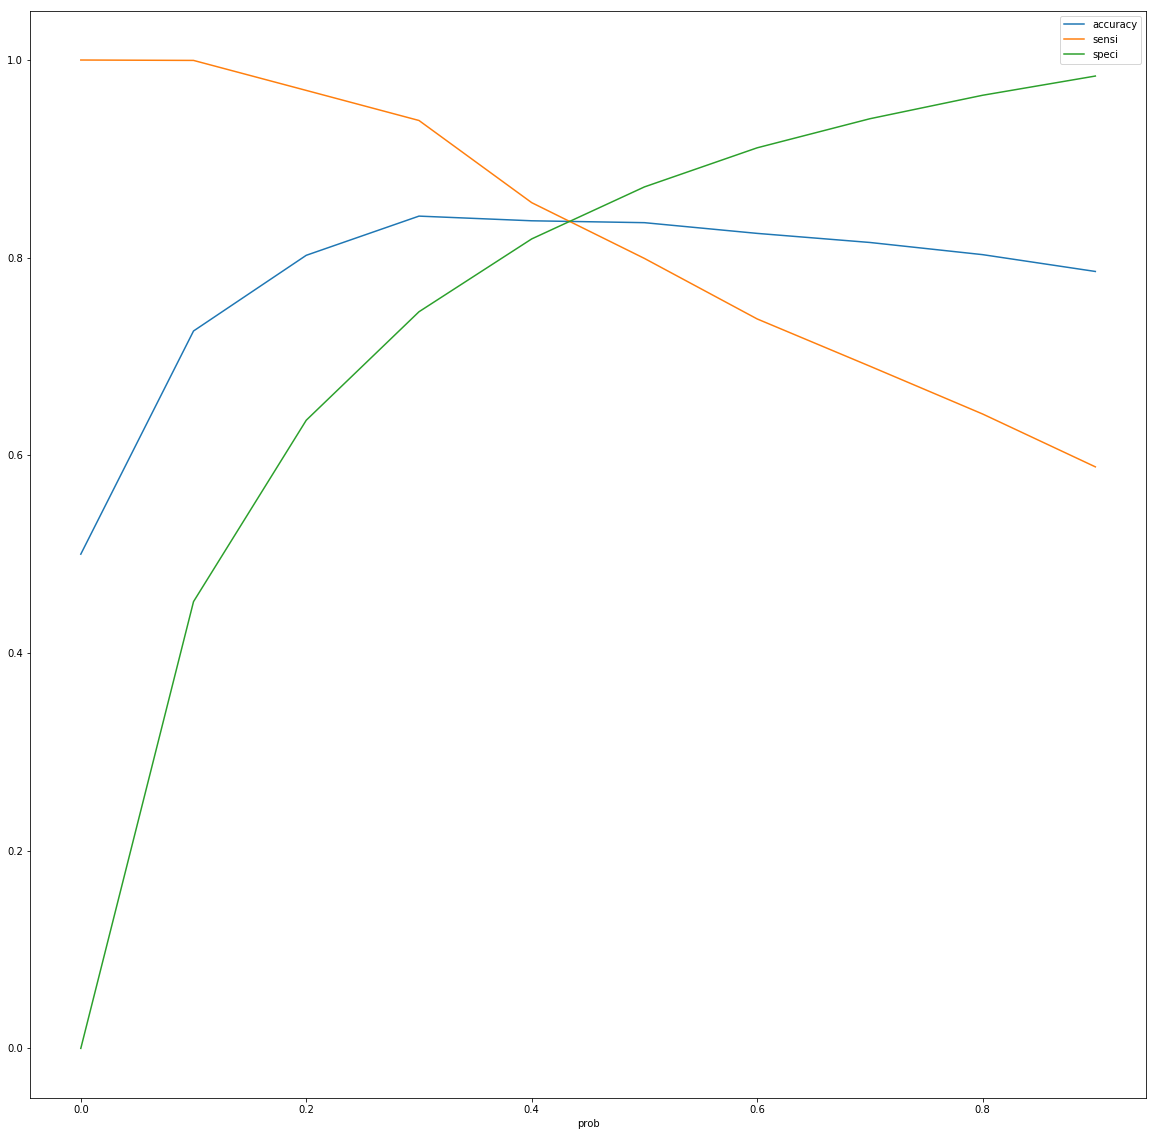

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import matplotlib.pyplot as plt
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

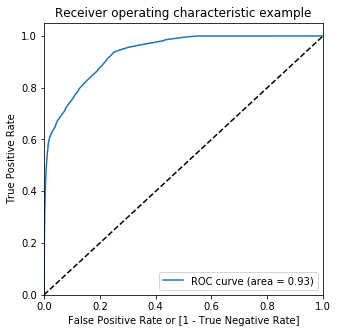

In [ ]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.214774,0,0,1,1,1,0,0,0,0,0,0,0,1
1,0,0.190735,1,0,1,1,0,0,0,0,0,0,0,0,1
2,0,0.003986,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.117007,3,0,1,1,0,0,0,0,0,0,0,0,1
4,0,0.265724,4,0,1,1,1,0,0,0,0,0,0,0,1


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.7258391908798127

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[ 89961, 109053],
       [    80, 198968]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9995980868936136

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.4520335252796286

## ADASYN Model 2:  Decision Tree

In [ ]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [34,35],"dtree__min_samples_split": [5,10],
          "dtree__min_samples_leaf": range(125, 145)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_clf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
model_clf.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': range(1, 40),
                                        'dtree__min_samples_leaf': range(5, 200, 20),
                                        'dtree__min_samples_split': range(5, 200, 20)},
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_clf.best_score_)
print("Best hyperparameters: ", model_clf.best_params_)

Best AUC:  0.999364623634724
Best hyperparameters:  {'dtree__min_samples_split': 5, 'dtree__min_samples_leaf': 145, 'dtree__max_depth': 34, 'dtree__criterion': 'entropy'}


In [ ]:
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]

Best Threshold=0.420690


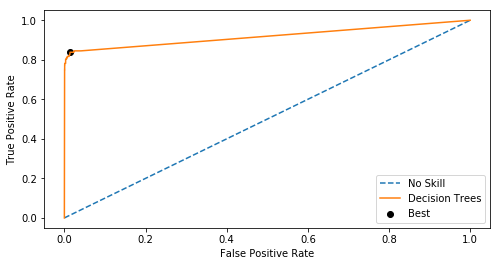

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Trees')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[84175  1126]
 [   25   117]]
Sensitivity: 	0.82
Specificity: 	0.99
AUC:    	 0.91


In [ ]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','Sensitivity','Specificity',' Train AUC Score','Test AUC Score']
models_adasyn = pd.DataFrame(columns = cols)

In [ ]:
models_adasyn.loc[-1] = ["Decision Trees",round(sensitivity,4),round(specificity,4),round(model_clf.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Trees,0.8239,0.9868,0.9994,0.9054


## ADASYN Model 3:  XG Boost

In [ ]:
from xgboost import XGBClassifier

#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('Xgb', XGBClassifier(objective = 'binary:logistic',n_estimators=120,random_state = 42))])

# hyperparameter space
params = [
{"Xgb__learning_rate"    : [0.25, 0.30] ,
 "Xgb__max_depth"        : [ 5, 6],
 "Xgb__min_child_weight" : [3, 5],
 "Xgb__gamma"            : [ 0.0, 0.1],
 "Xgb__colsample_bytree" : [ 0.3, 0.4] }
]
# Best hyperparameters:  {'Xgb__min_child_weight': 5, 'Xgb__max_depth': 5, 'Xgb__learning_rate': 0.3, 'Xgb__gamma': 0.0, 'Xgb__colsample_bytree': 0.4}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_xgb = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
model_xgb.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 55.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('Xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                                            max_de

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best AUC:  0.9999902014720741
Best hyperparameters:  {'Xgb__min_child_weight': 5, 'Xgb__max_depth': 5, 'Xgb__learning_rate': 0.3, 'Xgb__gamma': 0.0, 'Xgb__colsample_bytree': 0.4}


In [ ]:
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]

Best Threshold=0.001687


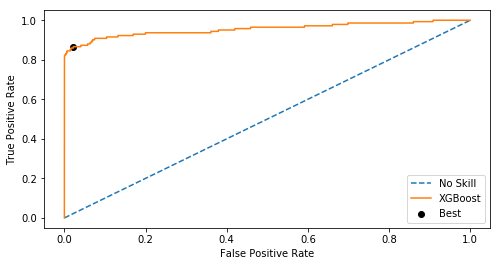

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[83431  1870]
 [   20   122]]
Sensitivity: 	0.86
Specificity: 	0.98
AUC:    	 0.92


In [ ]:
models_adasyn.loc[-1] = ["XgBoost",round(sensitivity,4),round(specificity,4),round(model_xgb.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XgBoost,0.8592,0.9781,1.0000,0.9186
1,Decision Trees,0.8239,0.9868,0.9994,0.9054


## ADASYN Model 4: Random Forest

In [ ]:
#Pipeline Processing Random forest classifier
pipe = Pipeline([('randomforest', RandomForestClassifier(warm_start = True,random_state = 42))])

# hyperparameter space
params = [
{'randomforest__n_estimators': [100, 200], 'randomforest__min_samples_leaf': [10,20], 
 'randomforest__criterion': ["gini", "entropy"]}
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_rf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)

In [ ]:
# fit model
model_rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 143.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 166.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=Pipeline(steps=[('randomforest',
                                              RandomForestClassifier(random_state=42,
                                                                     warm_start=True))]),
                   n_jobs=-1,
                   param_distributions=[{'randomforest__criterion': ['gini',
                                                                     'entropy'],
                                         'randomforest__min_samples_leaf': [10,
                                                                            20,
                                                                            30],
                                         'randomforest__n_estimators': range(100, 500, 100)}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9999928134884056
Best hyperparameters:  {'randomforest__n_estimators': 200, 'randomforest__min_samples_leaf': 10, 'randomforest__criterion': 'entropy'}


In [ ]:
y_pred_prob = model_rf.predict_proba(X_test_adasyn)[:, 1]

Best Threshold=0.080171


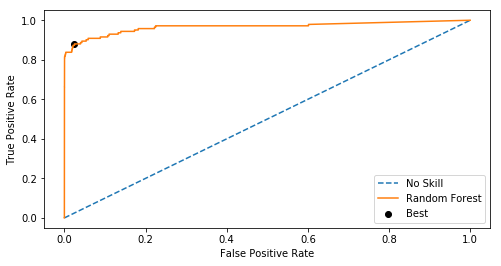

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[83182  2119]
 [   18   124]]
Sensitivity: 	0.87
Specificity: 	0.98
AUC:    	 0.92


In [ ]:
models_adasyn.loc[-1] = ["XgBoost",round(sensitivity,4),round(specificity,4),round(model_rf.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XGBoost,0.8980,0.9895,0.9999,0.9843
1,Random Forest,0.9082,0.9918,1.0000,0.9705
2,Decision Trees,0.8673,0.9731,0.9772,0.9448
3,Logistic Regression,0.9082,0.9801,0.9681,0.9441


# **Summary:**

## For imbalanced dataset:
### Logistic Regression: 
1. Sensitivity = 0.8143
2. Specificity = 0.99966
3. AUC = 0.98

### Decision Tree:
1. Sensitivity = 0.8143
2. Specificity = 0.99966
3. AUC = 0.98

### Random Forest:
1. Sensitivity = 0.8143
2. Specificity = 0.99966
3. AUC = 0.98

### XGBoost:
1. Sensitivity = 0.8143
2. Specificity = 0.99966
3. AUC = 0.98

## **Balanced** **Data**:
### **I. Uniform Oversampling**:
### Logistic Regression: 
1. Sensitivity = 0.82
2. Specificity = 0.9966
3. AUC = 0.99

### Decision Tree:
1. Sensitivity = 0.8099
2. Specificity = 0.9865
3. AUC = 0.9339

### Random Forest:
1. Sensitivity = 0.831
2. Specificity = 0.9968
3. AUC = 0.9669

### XGBoost:
1. Sensitivity = 0.8143
2. Specificity = 0.99966
3. AUC = 0.98

### **II. Random Oversampling**:
### Logistic Regression: 
1. Sensitivity = 0.9392
2. Specificity = 0.93199
3. AUC = 0.98

### Decision Tree:
1. Sensitivity = 0.82
2. Specificity = 0.99
3. AUC = 0.9998

### Random Forest:
1. Sensitivity = 0.84
2. Specificity = 0.99
3. AUC = 0.999

### XGBoost:
1. Sensitivity = 0.84
2. Specificity = 0.999
3. AUC = 0.999

### **III. SMOTE**:
### Logistic Regression: 
1. Sensitivity = 0.884
2. Specificity = 0.9245
3. AUC = 0.96

### Decision Tree:
1. Sensitivity = 0.8649
2. Specificity = 0.979
3. AUC = 0.9993

### Random Forest:
1. Sensitivity = 0.89
2. Specificity = 0.97
3. AUC = 0.93

### XGBoost:
1. Sensitivity = 0.89
2. Specificity = 0.95
3. AUC = 0.92

### **IV. ADASYN**:
### Logistic Regression: 
1. Sensitivity = 0.7993
2. Specificity = 0.87
3. AUC = 0.93

### Decision Tree:
1. Sensitivity = 0.8239
2. Specificity = 0.9868
3. AUC = 0.9994

### Random Forest:
1. Sensitivity = 0.87
2. Specificity = 0.98
3. AUC = 0.92

### XGBoost:
1. Sensitivity = 0.8592
2. Specificity = 0.9781
3. AUC = 1.00

### IMPORTANT FEATURES:

In [ ]:
params = {'learning_rate': 0.15,
          'max_depth': 15,
          'gamma':0.4,
         'colsample_bytree':0.3}

# fit model on training data
clf = XGBClassifier(params = params) 
clf.fit(X_train_smote, y_train_smote)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

[22:06:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'colsample_bytree': 0.3, 'gamma': 0.4,
                      'learning_rate': 0.15, 'max_depth': 15},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Top var = 15
2nd Top var = 5
3rd Top var = 9


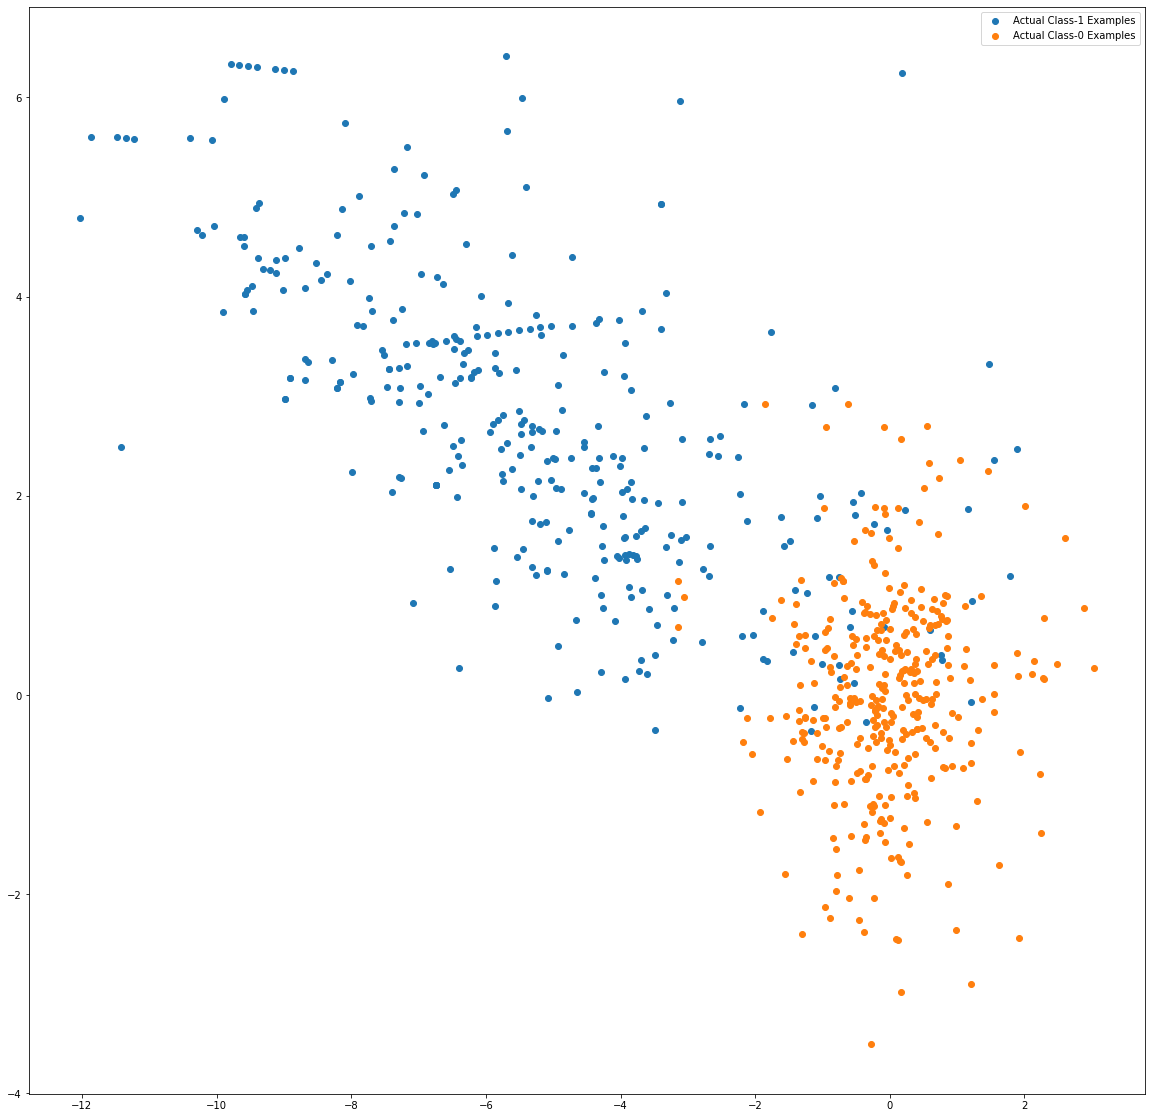

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()